# Tesco Large

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import datetime as dt
import statsmodels.api as sm 
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.express as px

In [3]:
#import dataset - pladis products
mcv_dig_250g=pd.read_excel("Tesco Large/Tesco Large MCVTS DGSTVS 250G SNGL.xlsx")
mcv_dig_400g=pd.read_excel("Tesco others/new-Tesco Large MCVTS DGSTVS 400G SNGL.xlsx")
mcv_dig_400g_twin=pd.read_excel("Tesco others/new-Tesco Large MCVTS DGSTVS 400G 2PACK.xlsx")
mcv_rt_300g=pd.read_excel("Tesco Large/Tesco Large RCH T MCVTS RCH T PLN 300 GM SNGL.xlsx")
mcv_rt_300g_twin=pd.read_excel("Tesco Large/Tesco Large RCH T MCVTS RCH T PLN 300 GM 2 PCK.xlsx")

# import dataset - competitors products
tes_dig_400g=pd.read_excel("Tesco Large/Tesco Large (own label) TSC DGSTVS PLN 400 GM SNGL.xlsx")
tes_mill_400g=pd.read_excel("Tesco Large/Tesco Large (own label) 'TSC-MS-MLL'S-DGSTV-BSCTS PLN 400 GM SNGL.xlsx")
tes_rt_250g=pd.read_excel("Tesco Large/Tesco Large (own label) RCH T TSC RCH T FNGRS PLN 250 GM SNGL.xlsx")
tes_rt_300g=pd.read_excel("Tesco Large/Tesco Large (own label) RCH T TSC RCH T PLN 300 GM SNGL.xlsx")
# tes_rt_300g_missing=pd.read_excel("Tesco Large/missing - Tesco Large (own label) RCH T TSC RCH T PLN 300 GM SNGL.xlsx")


In [4]:
mcv_list=[mcv_dig_250g,mcv_dig_400g,mcv_dig_400g_twin,mcv_rt_300g,mcv_rt_300g_twin]
tes_list=[tes_dig_400g,tes_mill_400g,tes_rt_250g,tes_rt_300g]
tes_large=[mcv_dig_250g,mcv_dig_400g,mcv_dig_400g_twin,mcv_rt_300g,mcv_rt_300g_twin,
           tes_dig_400g,tes_mill_400g,tes_rt_250g,tes_rt_300g]

## Exploration of the dataset 

In [5]:
pd.plotting.register_matplotlib_converters()

In [6]:
def basic_info(df):
    # look at data
    display(df.head())

    # look a shape of data
    display(df.shape)

    # look at data types. Ideally look at all rows. Only look at first five here for minimal output.
    display(df.dtypes)
    
    # see if any columns have nulls. Ideally look at all rows. Only look at first five here for minimal output.
    display(df.isnull().any())
    
    # display descriptive statistics
    display(df.describe(percentiles=[0.25,0.5,0.75,0.95,0.99]))
    
    print('Dataset has: ' + str(len(df.index)) + 'rows')
    
    print('Missing values:') 
    print(df.isnull().sum())
    
    print('Screen out distribution>100:')
    print(df[df.Distribution>100].count(axis=0))
    
    print('Screen out negative data: ')
    print(df[df.iloc[:,1:8]<0].count(axis=0))

In [7]:
def plot_data(dt):

# specify columns to plot
    values = dt.values
#   groups = [1, 2, 3, 4, 5, 6]
    
    # plot each column
    plt.figure()
    plt.figure(figsize=(23, 15))

#     for group in groups:
    plt.subplot(6, 1, 1)
    dt.groupby('Date')['Volume'].sum().plot(kind='line', figsize=(23,15), color="royalblue", linewidth=2)
    plt.title('Volume',y=0.5, loc='right')
    plt.subplot(6, 1, 2)
    dt.groupby('Date')['Value'].sum().plot(kind='line', figsize=(23,15), color="royalblue", linewidth=2)
    plt.title('Value', y=0.5, loc='right')
    plt.subplot(6, 1, 3)
    dt.groupby('Date')['Distribution'].sum().plot(kind='line', figsize=(23,15), color="royalblue", linewidth=2)
    plt.title('Distribution', y=0.5, loc='right')
    plt.subplot(6, 1, 4)
    dt.groupby('Date')['Promotional Distribution'].sum().plot(kind='line', figsize=(23,15), color="royalblue", linewidth=2)
    plt.title('Promotional Distribution', y=0.5, loc='right')
    plt.subplot(6, 1, 5)
    dt.groupby('Date')['£/unit'].sum().plot(kind='line', figsize=(23,15), color="royalblue", linewidth=2)
    plt.title('£/unit', y=0.5, loc='right')
    plt.subplot(6, 1, 6)
    dt.groupby('Date')['£/kg'].sum().plot(kind='line', figsize=(23,15), color="royalblue", linewidth=2)
    plt.title('£/kg', y=0.5, loc='right')

    plt.show()

#     dt.groupby('Date')['Units'].sum().plot(kind='line', figsize=(6,3), color="teal", linewidth=2)
#     dt.groupby('Date')['Volume'].sum().plot(kind='line', figsize=(6,3), color="teal", linewidth=2)
#     dt.groupby('Date')['Value'].sum().plot(kind='line', figsize=(6,3), color="teal", linewidth=2)
#     dt.groupby('Date')['Distribution'].sum().plot(kind='line', figsize=(6,3), color="teal", linewidth=2)
#     dt.groupby('Date')['Promotional Distribution'].sum().plot(kind='line', figsize=(6,3), color="teal", linewidth=2)
#     dt.groupby('Date')['£/unit'].sum().plot(kind='line', figsize=(6,3), color="teal", linewidth=2)
#     dt.groupby('Date')['£/kg'].sum().plot(kind='line', figsize=(6,3), color="teal", linewidth=2)



In [9]:
#add columns related to datetime
tes_large1=[]

for df in tes_large:
#     df = DataFrame(data)
    df=df[:275]
    date_time = df['SDESC'].str[3:]
    date_time=pd.to_datetime(date_time, format='%d.%m.%y')
    df['SDESC']=date_time
    df.rename(columns={'SDESC':'Date'}, inplace=True)
    
    df['year'] = pd.DatetimeIndex(df['Date']).year
    df['quarter'] = pd.DatetimeIndex(df['Date']).quarter
    # month as number
    df['month'] = pd.DatetimeIndex(df['Date']).month
    # week as number
    df['week'] = pd.DatetimeIndex(df['Date']).week
#     df=df.set_index('Date')
    tes_large1.append(df)
    continue
    
mcv_dig_250g=tes_large1[0]
mcv_dig_400g=tes_large1[1]
mcv_dig_400g_twin=tes_large1[2]
mcv_rt_300g=tes_large1[3]
mcv_rt_300g_twin=tes_large1[4]
tes_dig_400g=tes_large1[5]
tes_mill_400g=tes_large1[6]
tes_rt_250g=tes_large1[7]
tes_rt_300g=tes_large1[8]

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

### Preparation for Time Series Models

Apply time series models first: standard time series dataset (date, sales units...). Time series models only require date and sales data, and the models are able to capture the trend and seasonality on their own. It's convenient and straightforward to see the results.

We need to check the stationarity of the dataset first. By stationarity, it means:
- constant mean and variance

Tests to check stationarity:
1. Rolling Statistics
    -Plot the moving average or moving variance and see if it varies with time. More of a visual technique.
2. ADCF Test
    -Null hypothesis is that the TS is non-stationary. Compare t-stats and p-value to see if can reject the null or 
    not. 

In [10]:
#plot acf, pacf, original graph
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

def tsplot(y, title, lags=100, figsize=(10,6)):
    '''Examine the patterns of ACF and PACF, along with the time series plot and histogram.
    '''
    fig=plt.figure(figsize=figsize)
    layout=(2,2)
    ts_ax=plt.subplot2grid(layout, (0,0))
    hist_ax=plt.subplot2grid(layout, (0,1))
    acf_ax=plt.subplot2grid(layout, (1,0))
    pacf_ax=plt.subplot2grid(layout, (1,1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title, fontsize=14, fontweight='bold')
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    plot_acf(y, lags=lags, ax=acf_ax)
    plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

In [11]:
from statsmodels.tsa.stattools import adfuller

def plot(data):
    dftest=adfuller(data['Volume'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)
    
    sales=data[['Date','Volume']]
    sales=sales.set_index('Date')
    sales.head()
    
    #rolling mean and std in a yearly base
    rolmean=sales.rolling(window=52).mean()
    rolstd=sales.rolling(window=52).std()

    #static graph
    origin=plt.plot(sales, color='blue', label='Original')
    mean=plt.plot(rolmean, color='red', label='Rolling Mean')
    std=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

we are not able to reject the null, thus we confirm that our dataset is not stationary.

autocorrelation captures the series itself, and how it correlated with its own path. (yt and yt-1)
a correlation of a variable itself at different time is known as autocorrelation.

Large number of time series models require stationarity of the dataset because if the dataset is not stationary, it will hard for the model to capture the trend, which will affect the accuracy of the future predictions. 

In [12]:
# tsplot(series_transformed['Volume_transformed'].dropna(), title=sales.columns[0], lags=100)

Critical values are greater than test statistic, and our p-value is extremely small, which means we are able to reject the null hypothesis. Thus, our dataset is stationary. 

In [13]:
#make the dataset stationary
def plot_transform(data):
    sales=data[['Date','Volume']]
    sales=sales.set_index('Date')
    
    series_transformed=sales.copy()
    series_transformed['Volume_transformed']=np.log(sales).diff(1)
    
    #rolling mean and std in a yearly base
    rolmean_diff=series_transformed['Volume_transformed'].rolling(window=52).mean()
    rolstd_diff=series_transformed['Volume_transformed'].rolling(window=52).std()

    #static graph
    origin=plt.plot(series_transformed['Volume_transformed'], color='blue', label='Original')
    mean=plt.plot(rolmean_diff, color='red', label='Rolling Mean')
    std=plt.plot(rolstd_diff, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Results of Dickey-Fuller Test:')
    dftest=adfuller(series_transformed['Volume_transformed'].dropna(), autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)

## Overall Baseline Model

In [14]:
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
 
def baseline_model(df):    
    # Create lagged dataset
    sales = df[['Date','Volume']]
    sales=sales.set_index('Date')
    values = DataFrame(sales.values)
    dataframe = concat([values.shift(1), values], axis=1)
    dataframe.columns = ['t-1', 't+1']
    print(dataframe.head(5))

    # split into train and test sets
    X = dataframe.values
#     train_size = int(len(X) * 0.66)
    train, test = X[:248], X[248:]
    train_X, train_y = train[:,0], train[:,1]
    test_X, test_y = test[:,0], test[:,1]

    # persistence model
    def model_persistence(x):
        return x

    # walk-forward validation
    predictions = list()
    for x in test_X:
        yhat = model_persistence(x)
        predictions.append(yhat)
    test_mse_score = mean_squared_error(test_y, predictions)
    test_rmse_score = sqrt(mean_squared_error(test_y, predictions))

    print('Test MSE: %.3f' % test_mse_score)
    print('Test RMSE: %.3f' % test_rmse_score)

    # plot predictions and expected results
    plt.plot(train_y)
    plt.plot([None for i in train_y] + [x for x in test_y])
    plt.plot([None for i in train_y] + [x for x in predictions])
    plt.show()

## Simple Exponential Smoothing

Simple exponential smoothing: forecast future values using a weighted average of all previous values in the series.
Exponential smoothing is an intuitive forecasting method that weights the observed time series unequally. Recent observations are weighted more heavily than remote observations.

This model does not require stationarity of a dataset, so we apply the model with original data first to see the accuracy. 

In [15]:
#extract volume column
from statsmodels.tsa.api import SimpleExpSmoothing
from pandas import DataFrame

def ses_model(data):
    sales=data[['Date','Volume']]
    sales=sales.set_index('Date')
    sales_origin=sales.copy()
    sales_train_origin=sales_origin[:248]
    sales_test_origin=sales_origin[248:]

    print('Observations: %d' % (len(sales_origin)))
    print('Training Observations: %d' % (len(sales_train_origin)))
    print('Testing Observations: %d' % (len(sales_test_origin)))

    # then plotting it using different colors
    plt.plot(sales_train_origin)
    plt.plot(sales_test_origin)
    plt.show()
    
    for i in range(1,10,1):
        ses_pred_ori = sales_test_origin.copy()
        ses_ori_fit = SimpleExpSmoothing(np.asarray(sales_train_origin['Volume'])).fit(smoothing_level=i*0.1, optimized=False)
        ses_pred_ori['SES_Ori'] = ses_ori_fit.forecast(len(sales_test_origin))

        rmse_ses_ori=sqrt(mean_squared_error(sales_test_origin.Volume, ses_pred_ori.SES_Ori))
        print("RMSE for Simple Exponential Smoothing α= " + str(i*0.1) + " is: " + str(round(rmse_ses_ori,2)))

    #lowest RMSE with graph
    ses_pred_ori = sales_test_origin.copy()
    ses_ori_fit = SimpleExpSmoothing(np.asarray(sales_train_origin['Volume'])).fit(smoothing_level=0.1, optimized=False)
    ses_pred_ori['SES_Ori'] = ses_ori_fit.forecast(len(sales_test_origin))
    plt.figure(figsize=(8,4))
    plt.plot(sales_train_origin['Volume'], label='Train')
    plt.plot(sales_test_origin['Volume'], label='Test')
    plt.plot(ses_pred_ori['SES_Ori'], label='Simple_ES')
    plt.legend(loc='best')
    plt.show()
    
    sales_origin=np.log(sales).copy()
    sales_train_origin=sales_origin[:248]
    sales_test_origin=sales_origin[248:]

    ses_pred_ori = sales_test_origin.copy()
    ses_ori_fit = SimpleExpSmoothing(np.asarray(sales_train_origin['Volume'])).fit(smoothing_level=0.1, optimized=False)
    ses_pred_ori['SES_Ori'] = ses_ori_fit.forecast(len(sales_test_origin))

    ses_pred_ori['Actual_Sales']=np.exp(ses_ori_fit.forecast(len(sales_test_origin)))
    ses_pred_ori['Pred_Sales']=np.exp(ses_pred_ori['Volume'])

    rmse_ses_ori=sqrt(mean_squared_error(ses_pred_ori['Actual_Sales'], ses_pred_ori['Pred_Sales']))
    rmse_ses_ori
    

We found out that RMSE above for different smoothing values are quite large. We consider to remove trend and seasonality to re-apply the model for another forecast. Such large RMSE also prove that Simple Exponential Smoothing model cannot capture the trend and seasonality of a dataset.

Even we use the stationary dataset, we are still got large error, which means the model is not able to capture the trend and seasonality of our data. 

## Holt's Linear Model 

Holt's linear model can only capture the trend, not seasonality.

In [16]:
# apply the model
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import Holt

def holt_linear_model(data):
    sales=data[['Date','Volume']]
    sales=sales.set_index('Date')
    sales_origin=sales.copy()
    sales_train_origin=sales_origin[:248]
    sales_test_origin=sales_origin[248:]

    print('Observations: %d' % (len(sales_origin)))
    print('Training Observations: %d' % (len(sales_train_origin)))
    print('Testing Observations: %d' % (len(sales_test_origin)))

    aList=[]
    bList=[]
    cList=[]

    for i in range(1,10,1):
        for j in range(1,10,1): 
            holt_linear_pred = sales_test_origin.copy()

            sales_holt_linear_fit = Holt(np.asarray(sales_train_origin['Volume'])).fit(smoothing_level = i*0.1,smoothing_slope = j*0.1, optimized=False)
            holt_linear_pred['Holt_linear'] = sales_holt_linear_fit.forecast(len(sales_test_origin))

            rmse_holt_linear=sqrt(mean_squared_error(sales_test_origin.Volume, holt_linear_pred.Holt_linear))
            aList.append(round(rmse_holt_linear,2))
            bList.append(str(i*0.1))
            cList.append(str(j*0.1))

    min_rmse=aList.index(min(aList))

    print("Min RMSE for Holt Linear Forecasting α= " + str(bList[min_rmse]) + " and β= " + str(cList[min_rmse]) + " is: " + str(aList[min_rmse]))

    holt_linear_pred = sales_test_origin.copy()
    sales_holt_linear_fit = Holt(np.asarray(sales_train_origin['Volume'])).fit(smoothing_level = 0.1,smoothing_slope = 0.1, optimized=False)
    holt_linear_pred['Holt_linear'] = sales_holt_linear_fit.forecast(len(sales_test_origin))

    plt.figure(figsize=(8,4))
    plt.plot(sales_train_origin['Volume'], label='Train')
    plt.plot(sales_test_origin['Volume'], label='Test')
    plt.plot(holt_linear_pred['Holt_linear'], label='Holt_linear')
    plt.legend(loc='best')
    plt.show()
    

### Re-apply the model by removing the seasonality through log & diff12

In [17]:
def holt_linear_model_log(data):
    sales=data[['Date','Volume']]
    sales=sales.set_index('Date')

    # Remove seasonality by log&diff12
    sales_no_season=sales.copy()
    sales_no_season['diff1']=np.log(sales_no_season).diff(12)
    sales_no_season.head(15)

    #split training and test
    sales_origin=sales.copy()
    holt_linear_train=sales_no_season.diff1[:248].dropna()
    holt_linear_test=sales_no_season.diff1[248:].dropna()

    sales_origin=sales.copy()

    print('Observations: %d' % (len(sales_origin)))
    print('Training Observations: %d' % (len(holt_linear_train)))
    print('Testing Observations: %d' % (len(holt_linear_test)))

    # then plotting it using different colors
    plt.plot(holt_linear_train)
    plt.plot(holt_linear_test)
    plt.show()

    sales_holt_linear_fit = Holt(np.asarray(holt_linear_train)).fit(smoothing_level = 0.1, smoothing_slope = 0.1, optimized=False)
    sales_pred_holt_linear= sales_holt_linear_fit.forecast(len(holt_linear_test))
    sales_pred_holt_linear

    #reverse the forecast to the original unit
    sales_org_test=sales[248:]

    holt_linear=np.exp(sales_pred_holt_linear)*sales.Volume[248:]
    holt_linear=holt_linear.to_frame(name='pred_value')

    pred_result_holt_linear=pd.merge(sales_org_test, holt_linear, how='left', on='Date')
    pred_result_holt_linear

    plt.figure(figsize=(8,4))
    plt.plot(sales.Volume[:248], label='Train')
    plt.plot(sales.Volume[248:], label='Test')
    plt.plot(pred_result_holt_linear['pred_value'], label='Holt_linear')
    plt.legend(loc='best')
    plt.show()

    rmse_holt_linear=sqrt(mean_squared_error(sales.Volume[248:], holt_linear))
    print("RMSE for Holt Linear Forecasting with transformation is: " + str(rmse_holt_linear))
    

After differencing, the RMSE got much better.

--------------

## Holt Winter's Exponential Smoothing Model


This model can capture both trend and seasonlity.

In [18]:
def holt_winter_model(data):
    sales=data[['Date','Volume']]
    sales=sales.set_index('Date')

    sales_origin=sales.copy()
    sales_train_origin=sales_origin[:248]
    sales_test_origin=sales_origin[248:]

    fit1 = ExponentialSmoothing(sales_train_origin, seasonal_periods=52, trend='add', seasonal='add').fit(use_boxcox=True,smoothing_level=0.1, smoothing_slope=0.05,smoothing_seasonal=0.1)
    fit2 = ExponentialSmoothing(sales_train_origin, seasonal_periods=52, trend='add', seasonal='mul').fit(use_boxcox=True,smoothing_level=0.1, smoothing_slope=0.05,smoothing_seasonal=0.1)
    fit3 = ExponentialSmoothing(sales_train_origin, seasonal_periods=52, trend='mul', seasonal='mul').fit(use_boxcox=True,smoothing_level=0.1, smoothing_slope=0.05,smoothing_seasonal=0.1)
    fit4 = ExponentialSmoothing(sales_train_origin, seasonal_periods=52, trend='add', seasonal='add', damped=True).fit(use_boxcox=True,smoothing_level=0.1, smoothing_slope=0.05,smoothing_seasonal=0.1)
    fit5 = ExponentialSmoothing(sales_train_origin, seasonal_periods=52, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True,smoothing_level=0.1, smoothing_slope=0.05,smoothing_seasonal=0.1)
    fit6 = ExponentialSmoothing(sales_train_origin, seasonal_periods=52, trend='mul', seasonal='mul', damped=True).fit(use_boxcox=True,smoothing_level=0.1, smoothing_slope=0.05,smoothing_seasonal=0.1)


    ax = sales_train_origin.plot(figsize=(10,6), marker='o', color='black', title="Forecasts from Holt-Winters' multiplicative method" )
    ax.set_ylabel("Volume Sales")
    ax.set_xlabel("Date")
    # fit1.fittedvalues.plot(ax=ax, style='--', color='red')
    # fit2.fittedvalues.plot(ax=ax, style='--', color='green')
    # fit3.fittedvalues.plot(ax=ax, style='--', color='yellow')
    # fit4.fittedvalues.plot(ax=ax, style='--', color='blue')

    fit1.forecast(len(sales_test_origin)).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', marker='o', color='red', legend=True)
    fit2.forecast(len(sales_test_origin)).rename('Holt-Winters (add-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='green', legend=True)
    fit3.forecast(len(sales_test_origin)).rename('Holt-Winters (mul-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='pink', legend=True)
    fit4.forecast(len(sales_test_origin)).rename('Holt-Winters (add-add-damp-seasonal)').plot(ax=ax, style='--', marker='o', color='yellow', legend=True)
    fit5.forecast(len(sales_test_origin)).rename('Holt-Winters (add-add-damp-seasonal)').plot(ax=ax, style='--', marker='o', color='purple', legend=True)
    fit6.forecast(len(sales_test_origin)).rename('Holt-Winters (mul-mul-damp-seasonal)').plot(ax=ax, style='--', marker='o', color='blue', legend=True)

    plt.show()

    rmse_winter1=sqrt(mean_squared_error(sales_test_origin, fit1.forecast(len(sales_test_origin))))
    rmse_winter2=sqrt(mean_squared_error(sales_test_origin, fit2.forecast(len(sales_test_origin))))
    rmse_winter3=sqrt(mean_squared_error(sales_test_origin, fit3.forecast(len(sales_test_origin))))
    rmse_winter4=sqrt(mean_squared_error(sales_test_origin, fit4.forecast(len(sales_test_origin))))
    rmse_winter5=sqrt(mean_squared_error(sales_test_origin, fit5.forecast(len(sales_test_origin))))
    rmse_winter6=sqrt(mean_squared_error(sales_test_origin, fit6.forecast(len(sales_test_origin))))
    print("RMSE for Holt-winter are:")
    print(rmse_winter1)
    print(rmse_winter2)
    print(rmse_winter3)
    print(rmse_winter4)
    print(rmse_winter5)
    print(rmse_winter6)


In [19]:
# def holt_winter_model_log(data):
#     sales=data[['Date','Volume']]
#     sales=sales.set_index('Date')

#     # Remove seasonality by log&diff12
#     sales_no_season=sales.copy()
#     sales_no_season['diff1']=np.log(sales_no_season).diff(12)
#     sales_no_season.head(15)

#     #split training and test
#     sales_origin=sales.copy()
#     holt_winter_train=sales_no_season.diff1[:248].dropna()
#     holt_winter_test=sales_no_season.diff1[248:].dropna()

#     print('Observations: %d' % (len(sales_origin)))
#     print('Training Observations: %d' % (len(holt_winter_train)))
#     print('Testing Observations: %d' % (len(holt_winter_test)))

#     # then plotting it using different colors
# #     plt.plot(holt_winter_train)
# #     plt.plot(holt_winter_test)
# #     plt.show()

#     fit1=ExponentialSmoothing(np.asarray(holt_winter_train), seasonal_periods=52, trend='add', seasonal='add').fit(use_boxcox=True,smoothing_level=0.1, smoothing_slope=0.05,smoothing_seasonal=0.1)
#     fit2=ExponentialSmoothing(np.asarray(holt_winter_train), seasonal_periods=52, trend='add', seasonal='mul').fit(use_boxcox=True,smoothing_level=0.1, smoothing_slope=0.05,smoothing_seasonal=0.1)
#     fit3=ExponentialSmoothing(np.asarray(holt_winter_train), seasonal_periods=52, trend='mul', seasonal='mul').fit(use_boxcox=True,smoothing_level=0.1, smoothing_slope=0.05,smoothing_seasonal=0.1)
#     fit4=ExponentialSmoothing(np.asarray(holt_winter_train), seasonal_periods=52, trend='add', seasonal='add', damped=True).fit(use_boxcox=True,smoothing_level=0.1, smoothing_slope=0.05,smoothing_seasonal=0.1)
#     fit5=ExponentialSmoothing(np.asarray(holt_winter_train), seasonal_periods=52, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True,smoothing_level=0.1, smoothing_slope=0.05,smoothing_seasonal=0.1)
#     fit6=ExponentialSmoothing(np.asarray(holt_winter_train), seasonal_periods=52, trend='mul', seasonal='mul', damped=True).fit(use_boxcox=True,smoothing_level=0.1, smoothing_slope=0.05,smoothing_seasonal=0.1)

#     #这俩好像不能一起plot
# #     ax = sales_origin.plot(figsize=(10,6), marker='o', color='black', title="Forecasts from Holt-Winters' multiplicative method" )
# #     ax.set_ylabel("Volume Sales")
# #     ax.set_xlabel("Date")

#     fit1.forecast(len(holt_winter_test)).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', marker='o', color='red', legend=True)
#     fit2.forecast(len(holt_winter_test)).rename('Holt-Winters (add-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='green', legend=True)
#     fit3.forecast(len(holt_winter_test)).rename('Holt-Winters (mul-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='pink', legend=True)
#     fit4.forecast(len(holt_winter_test)).rename('Holt-Winters (add-add-damp-seasonal)').plot(ax=ax, style='--', marker='o', color='yellow', legend=True)
#     fit5.forecast(len(holt_winter_test)).rename('Holt-Winters (add-add-damp-seasonal)').plot(ax=ax, style='--', marker='o', color='purple', legend=True)
#     fit6.forecast(len(holt_winter_test)).rename('Holt-Winters (mul-mul-damp-seasonal)').plot(ax=ax, style='--', marker='o', color='blue', legend=True)

# #     plt.show()

#     #reverse the forecast to the original unit
#     sales_org_test=sales[248:]

#     sales_pred_holt_winter1=fit1.forecast(len(holt_winter_test)).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', marker='o', color='red', legend=True)
#     sales_pred_holt_winter2=fit2.forecast(len(holt_winter_test)).rename('Holt-Winters (add-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='green', legend=True)
#     sales_pred_holt_winter3=fit3.forecast(len(holt_winter_test)).rename('Holt-Winters (mul-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='pink', legend=True)
#     sales_pred_holt_winter4=fit4.forecast(len(holt_winter_test)).rename('Holt-Winters (add-add-damp-seasonal)').plot(ax=ax, style='--', marker='o', color='yellow', legend=True)
#     sales_pred_holt_winter5=fit5.forecast(len(holt_winter_test)).rename('Holt-Winters (add-add-damp-seasonal)').plot(ax=ax, style='--', marker='o', color='purple', legend=True)
#     sales_pred_holt_winter6=fit6.forecast(len(holt_winter_test)).rename('Holt-Winters (mul-mul-damp-seasonal)').plot(ax=ax, style='--', marker='o', color='blue', legend=True)

#     holt_winter1=np.exp(sales_pred_holt_winter1)*sales.Volume[248:]
#     holt_winter1=holt_winter1.to_frame(name='pred_value')
#     holt_winter2=np.exp(sales_pred_holt_winter2)*sales.Volume[248:]
#     holt_winter2=holt_winter2.to_frame(name='pred_value')
#     holt_winter3=np.exp(sales_pred_holt_winter3)*sales.Volume[248:]
#     holt_winter3=holt_winter3.to_frame(name='pred_value')
#     holt_winter4=np.exp(sales_pred_holt_winter4)*sales.Volume[248:]
#     holt_winter4=holt_winter4.to_frame(name='pred_value')
#     holt_winter5=np.exp(sales_pred_holt_winter5)*sales.Volume[248:]
#     holt_winter5=holt_winter5.to_frame(name='pred_value')
#     holt_winter6=np.exp(sales_pred_holt_winter6)*sales.Volume[248:]
#     holt_winter6=holt_winter6.to_frame(name='pred_value')

# #     pred_result_holt_winter1=pd.merge(sales_org_test, holt_winter1, how='left', on='Date')
# #     pred_result_holt_winter1
# #     pred_result_holt_winter2=pd.merge(sales_org_test, holt_winter2, how='left', on='Date')
# #     pred_result_holt_winter2
# #     pred_result_holt_winter3=pd.merge(sales_org_test, holt_winter3, how='left', on='Date')
# #     pred_result_holt_winter3
# #     pred_result_holt_winter4=pd.merge(sales_org_test, holt_winter4, how='left', on='Date')
# #     pred_result_holt_winter4
# #     pred_result_holt_winter5=pd.merge(sales_org_test, holt_winter5, how='left', on='Date')
# #     pred_result_holt_winter5
# #     pred_result_holt_winter6=pd.merge(sales_org_test, holt_winter6, how='left', on='Date')
# #     pred_result_holt_winter6

#     #check RMSE for reversed model
#     rmse_winter1=sqrt(mean_squared_error(holt_winter_test, fit1.forecast(len(holt_winter_test))))
#     rmse_winter2=sqrt(mean_squared_error(holt_winter_test, fit2.forecast(len(holt_winter_test))))
#     rmse_winter3=sqrt(mean_squared_error(holt_winter_test, fit3.forecast(len(holt_winter_test))))
#     rmse_winter4=sqrt(mean_squared_error(holt_winter_test, fit4.forecast(len(holt_winter_test))))
#     rmse_winter5=sqrt(mean_squared_error(holt_winter_test, fit5.forecast(len(holt_winter_test))))
#     rmse_winter6=sqrt(mean_squared_error(holt_winter_test, fit6.forecast(len(holt_winter_test))))
#     print("RMSE for Holt-winter with log transformation is:")
#     print(rmse_winter1)
#     print(rmse_winter2)
#     print(rmse_winter3)
#     print(rmse_winter4)
#     print(rmse_winter5)
#     print(rmse_winter6)


In [20]:
# holt_winter_model_log(mcv_dig_250g)

Tried all three models with original value/unstationary dataset (without transformation). We can see that the RMSE is actually getting smaller. 

From Simple exponential smoothing: 1012
to Holt's linear: 898
to Holt Winter's: 738.

This can prove that holt winter's is the one that can capture more information than they other two models.

We also apply stationary data (after taking log and differencing) on holt's linear model. We get a small RMSE. Even though the exponential smoothing series models do not require stationarity, but stationarity and only contain the information the model can capture is important.

## Prophet 

In [21]:
!pip install fbprophet

In [22]:
from fbprophet import Prophet

Facebook developed an open sourcing Prophet. Facebook provides prophet model not only can take care of some outliers/unusual values, but also it can take care of missing values. It is almost able to fully automatically forecast the trend of the future time series. 

Prophet can deal with missing observations or large outliers, and can roll with the punches in relation to product launches or marketing pushes.

Built in Stan, which is really fast.

Prophet needs a very specific kind of dataframe for it to work on. What we need is:

Date column as ds & Value column as y.

In [23]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'samp

In [24]:
# load data, rename.headers, and check
def prophet_model(data):
    prophet_data=data[['Date','Volume']]
    # prophet_data['Date']=prophet_data.index
    prophet_data.rename(columns={'Date': 'ds','Volume': 'y'}, inplace=True)

    #define train and test size
    prophet_train=prophet_data[:248]
    prediction_size=27
    
    # fit model - baseline model (dataset is not stationary) 用原本的数据预测的 没有预测未来时间段的
    model=Prophet()
    model.fit(prophet_train)

    # make prediction
    future=model.make_future_dataframe(periods=prediction_size, freq='W')
    forecast=model.predict(future)
    
    #plot result
    pd.plotting.register_matplotlib_converters()
    mod=model.plot(forecast)
    forecast_graph=model.plot_components(forecast)
    
    # checking the results
    fig, ax = plt.subplots(figsize=(8,4))
    plt.plot(forecast['yhat'])
    #plt.plot(cmp_df['yhat_lower'])
    #plt.plot(cmp_df['yhat_upper'])
    plt.plot(prophet_data['y'])
    plt.xlabel('Time')
    plt.ylabel('Weekly Sales Volume')
    ax.plot(forecast['yhat'], label='yhat', color='darkseagreen')
    #ax.plot(cmp_df['yhat_lower'], label='yhat_lower')
    #ax.plot(cmp_df['yhat_upper'], label='yhat_upper')
    ax.plot(prophet_data['y'], label='y', color='dodgerblue')
    ax.legend()
    plt.show()
    
    rmse_prophet=sqrt(mean_squared_error(prophet_data['y'], forecast['yhat']))
    print("RMSE for prophet model is: " + str(rmse_prophet))

The default mode for the prophet model is linear growth, we need to make some adjustments for that. 

### Prophet with Log Transformation 

Forecast above is not based on the stationary dataset, now we can make our time series stationary and see the result.

In [25]:
# log the original dataframe
def prophet_model_log(data):
    prophet_data=data[['Date','Volume']]
    prophet_data.rename(columns={'Date': 'ds','Volume': 'y'}, inplace=True)
    prophet_log=np.log(prophet_data['y'])
    prophet_log=prophet_log.to_frame()
    prophet_log['ds']=prophet_data['ds']
    prophet_log.head(10)

    prophet_log_train=prophet_log[:248]
    prediction_size=27

    # fit model - prophet model with logged data (dataset is not stationary) 用原本的数据预测的 没有预测未来时间段的
    model_log=Prophet()
    model_log.fit(prophet_log_train)

    # make prediction
    future_log=model_log.make_future_dataframe(periods=prediction_size, freq='W')
    forecast_log=model_log.predict(future_log)
    forecast_log

    # checking the results
    fig, ax = plt.subplots(figsize=(8,4))

    plt.plot(forecast_log['yhat'])
    #plt.plot(cmp_df['yhat_lower'])
    #plt.plot(cmp_df['yhat_upper'])
    plt.plot(prophet_log['y'])

    plt.xlabel('Time')
    plt.ylabel('Average Weekly Sales Volume')
    ax.plot(forecast_log['yhat'], label='yhat',color='darkseagreen')
    #ax.plot(cmp_df['yhat_lower'], label='yhat_lower')
    #ax.plot(cmp_df['yhat_upper'], label='yhat_upper')
    ax.plot(prophet_log['y'], label='y', color='dodgerblue')
    ax.legend()
    plt.show()

    # get the values back to their original scale
    forecast_df=forecast_log[['ds','yhat']]
    forecast_df.head()

    forecast_df['y_log']=prophet_log['y']
    forecast_df['sales_pred']=np.exp(forecast_df['yhat'])
    forecast_df['sales_origin']=np.exp(forecast_df['y_log'])
    forecast_df.head()

    rmse_prophet_log=sqrt(mean_squared_error(forecast_df['sales_origin'], forecast_df['sales_pred']))
    print("RMSE for prophet model after transformation is: "+ str(rmse_prophet_log))
          

### Prophet with Log Transformation and Seasonal Related Parameters

Now we see the dataset that has been transformed got lower RMSE. However, we still need to add other parameters because we want to capture the yearly peak pattern. We notice the seasonal pattern usually happened at the end of Dec. and April; thus, we will only focus on time around the two main holidays - Xmas and Easter.

In [26]:
# defined dataframe above
def prophet_log_season(data):
    prophet_data=data[['Date','Volume']]
    prophet_data.rename(columns={'Date': 'ds','Volume': 'y'}, inplace=True)
    prophet_log=np.log(prophet_data['y'])
    prophet_log=prophet_log.to_frame()
    prophet_log['ds']=prophet_data['ds']
    prophet_log.head(10)
    
    prophet_log_train=prophet_log[:248]
    prediction_size=27
    
    model_season = Prophet(growth='linear', yearly_seasonality=True, holidays_prior_scale=10)
    model_season.add_seasonality(name='monthly', period=27, fourier_order=5)
    model_season.add_country_holidays(country_name='UK')

    # fit model
    model_season.fit(prophet_log_train)
    # holiday_prior_scale; seasonality_prior_scale, holidays


    # make prediction
    future_season=model_season.make_future_dataframe(periods=prediction_size, freq='W')
    forecast_season=model_season.predict(future_season)
    
    print(model_season.train_holiday_names)
    
    prophet_result=model_season.plot(forecast_season)
    
    fig=model_season.plot_components(forecast_season)
    
    # checking the results
    fig, ax = plt.subplots(figsize=(8,4))

    plt.plot(forecast_season['yhat'])
    #plt.plot(cmp_df['yhat_lower'])
    #plt.plot(cmp_df['yhat_upper'])
    plt.plot(prophet_log['y'])

    plt.xlabel('Time')
    plt.ylabel('Average Weekly Sales Volume')
    ax.plot(forecast_season['yhat'], label='yhat',color='darkseagreen')
    #ax.plot(cmp_df['yhat_lower'], label='yhat_lower')
    #ax.plot(cmp_df['yhat_upper'], label='yhat_upper')
    ax.plot(prophet_log['y'], label='y',color='dodgerblue')
    ax.legend()
    plt.show()
    
    forecast_season_df=forecast_season[['ds','yhat']]
    forecast_season_df.head()
    
    forecast_season_df['y_log']=prophet_log['y']
    forecast_season_df['sales_pred']=np.exp(forecast_season_df['yhat'])
    forecast_season_df['sales_origin']=np.exp(forecast_season_df['y_log'])
    forecast_season_df.head()
    
    rmse_prophet_log=sqrt(mean_squared_error(forecast_season_df['sales_origin'], forecast_season_df['sales_pred']))
    print("RMSE for prophet with transformation and holiday is: "+ str(rmse_prophet_log))
    
    

### Transformation and Only focus on Christmas and Easter

In [27]:
easter=pd.DataFrame({
    'holiday': 'Easter',
    'ds': pd.to_datetime(['2014-04-20', '2015-04-05', '2016-03-27', '2017-04-16',
                         '2018-04-01', '2019-04-21', '2020-04-12']),
    'lower_window': -2,
    'upper_window': 5,
})

christmas=pd.DataFrame({
    'holiday': 'Christmas',
    'ds': pd.to_datetime(['2014-12-25','2015-12-25', '2016-12-25', '2017-12-25',
                         '2018-12-25', '2019-12-25', '2020-12-25']),
    'lower_window': -2,
    'upper_window': 7,
})

holidays=pd.concat((easter, christmas))

In [28]:
def prophet_log_two_holiday(data):
    prophet_data=data[['Date','Volume']]
    prophet_data.rename(columns={'Date': 'ds','Volume': 'y'}, inplace=True)
    prophet_log=np.log(prophet_data['y'])
    prophet_log=prophet_log.to_frame()
    prophet_log['ds']=prophet_data['ds']
    prophet_log.head(10)
    
    prophet_log_train=prophet_log[:248]
    prediction_size=27
    
    model_holiday = Prophet(growth='linear', yearly_seasonality=True, holidays=holidays, holidays_prior_scale=10)

    # fit model
    model_holiday.fit(prophet_log_train)

    # make prediction
    future_holiday=model_holiday.make_future_dataframe(periods=prediction_size, freq='W')
    forecast_holiday=model_holiday.predict(future_holiday)
    forecast_holiday

    # holidays effect display
    forecast_holiday[(forecast_holiday['Easter'] + forecast_holiday['Christmas']).abs() > 0][
            ['ds', 'Easter', 'Christmas']][-10:]

    prophet_holiday_result=model_holiday.plot(forecast_holiday)

    fig2=model_holiday.plot_components(forecast_holiday)

    # checking the results
    fig, ax = plt.subplots(figsize=(8,4))

    plt.plot(forecast_holiday['yhat'])

    plt.plot(prophet_log['y'])

    plt.xlabel('Time')
    plt.ylabel('Average Weekly Sales Volume')
    ax.plot(forecast_holiday['yhat'], label='yhat',color='darkseagreen')
    ax.plot(prophet_log['y'], label='y',color='dodgerblue')
    ax.legend()
    plt.show()

    forecast_holiday_df=forecast_holiday[['ds','yhat']]
    forecast_holiday_df.head()

    forecast_holiday_df['y_log']=prophet_log['y']
    forecast_holiday_df['sales_pred']=np.exp(forecast_holiday_df['yhat'])
    forecast_holiday_df['sales_origin']=np.exp(forecast_holiday_df['y_log'])
    forecast_holiday_df.head()

    rmse_prophet_holiday=sqrt(mean_squared_error(forecast_holiday_df['sales_origin'], forecast_holiday_df['sales_pred']))
    print(rmse_prophet_holiday)

Apply all time series models and continue with ml models and deep learning method

### Tesco Large - McVitie's Digestives 250g

In [29]:
basic_info(mcv_dig_250g)

,Date,Units,Volume,Value,Distribution,Promotional Distribution,£/unit,£/kg,year,quarter,month,week
0,2014-12-13,26252,6563.0,23366.0,97,0,0.890066,3.560262,2014,4,12,50
1,2014-12-20,28719,7179.8,25560.4,97,0,0.890017,3.560043,2014,4,12,51
2,2014-12-27,26468,6617.0,23557.3,97,0,0.890029,3.560118,2014,4,12,52
3,2015-01-03,19371,4842.8,17240.9,97,0,0.890037,3.560110,2015,1,1,1
4,2015-01-10,19424,4856.0,17286.2,97,0,0.889940,3.559761,2015,1,1,2


(275, 12)

Date                        datetime64[ns]
Units                                int64
Volume                             float64
Value                              float64
Distribution                         int64
Promotional Distribution             int64
£/unit                             float64
£/kg                               float64
year                                 int64
quarter                              int64
month                                int64
week                                 int64
dtype: object

Date                        False
Units                       False
Volume                      False
Value                       False
Distribution                False
Promotional Distribution    False
£/unit                      False
£/kg                        False
year                        False
quarter                     False
month                       False
week                        False
dtype: bool

,Units,Volume,Value,Distribution,Promotional Distribution,£/unit,£/kg,year,quarter,month,week
count,275.000000,275.000000,275.000000,275.000000,275.0,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,20520.490909,5130.149455,18329.931636,80.490909,0.0,0.893456,3.573803,2017.083636,2.469091,6.414545,26.043636
std,4210.161155,1052.540572,3749.070151,14.825841,0.0,0.016671,0.066685,1.534371,1.140635,3.547767,15.490223
min,8867.000000,2216.800000,7880.100000,58.000000,0.0,0.857718,3.430872,2014.000000,1.000000,1.000000,1.000000
25%,17533.500000,4383.400000,15739.200000,68.000000,0.0,0.889881,3.559501,2016.000000,1.000000,3.000000,12.000000
50%,20591.000000,5147.800000,18365.200000,75.000000,0.0,0.890022,3.560074,2017.000000,2.000000,6.000000,26.000000
75%,23810.000000,5952.550000,21191.250000,97.000000,0.0,0.890830,3.563291,2018.000000,3.500000,9.500000,39.500000
95%,26623.900000,6656.010000,23905.710000,99.000000,0.0,0.899990,3.599945,2019.000000,4.000000,12.000000,50.000000
99%,29826.920000,7456.730000,26560.368000,99.000000,0.0,0.999802,3.999195,2020.000000,4.000000,12.000000,52.000000
max,34927.000000,8731.800000,31083.300000,99.000000,0.0,1.000000,3.999962,2020.000000,4.000000,12.000000,53.000000


Dataset has: 275rows
Missing values:
Date                        0
Units                       0
Volume                      0
Value                       0
Distribution                0
Promotional Distribution    0
£/unit                      0
£/kg                        0
year                        0
quarter                     0
month                       0
week                        0
dtype: int64
Screen out distribution>100:
Date                        0
Units                       0
Volume                      0
Value                       0
Distribution                0
Promotional Distribution    0
£/unit                      0
£/kg                        0
year                        0
quarter                     0
month                       0
week                        0
dtype: int64
Screen out negative data: 
Date                        0
Units                       0
Volume                      0
Value                       0
Distribution                0
Promotional

<Figure size 432x288 with 0 Axes>

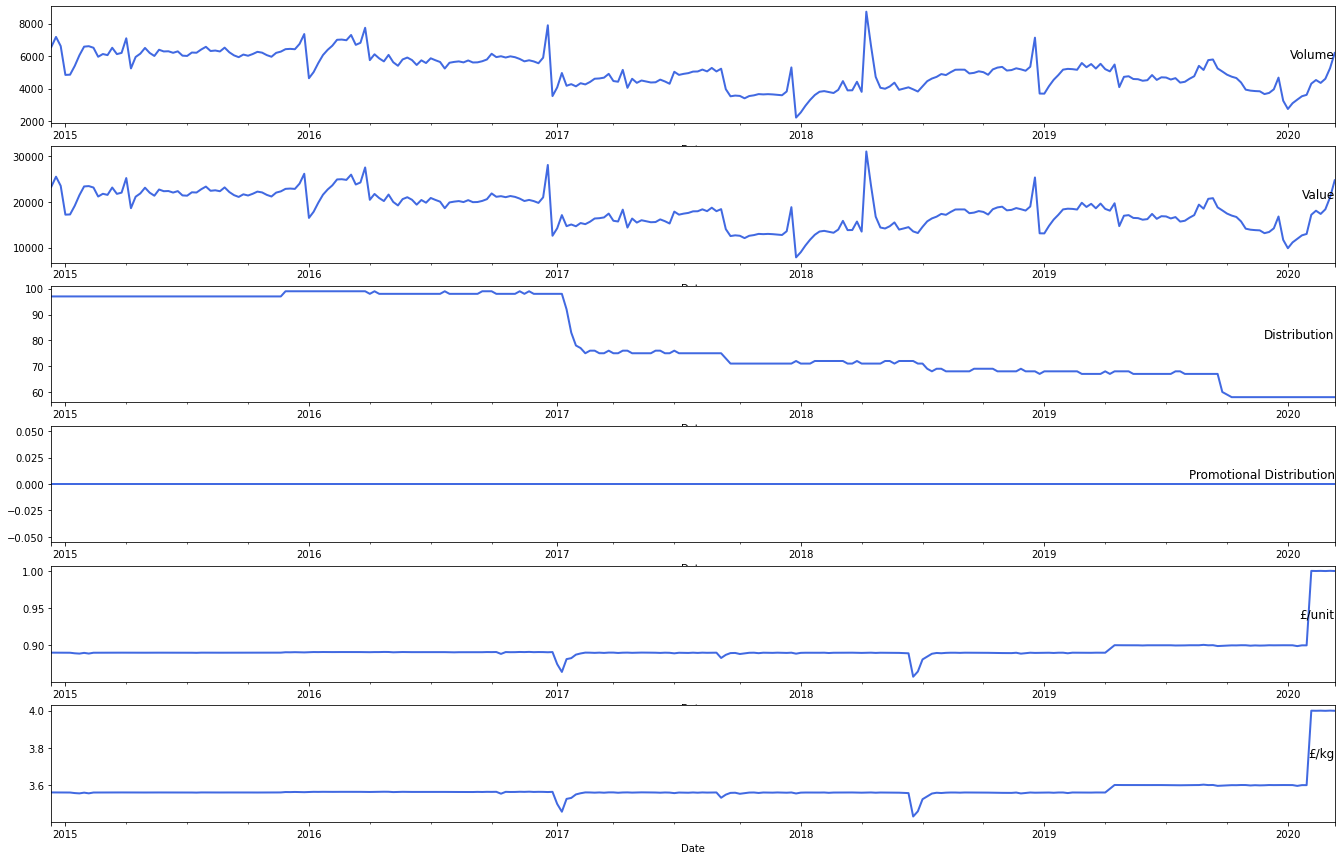

In [30]:
#plot each variable of the dataset
plot_data(mcv_dig_250g)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fbe628d3908>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbe6286f5f8>)

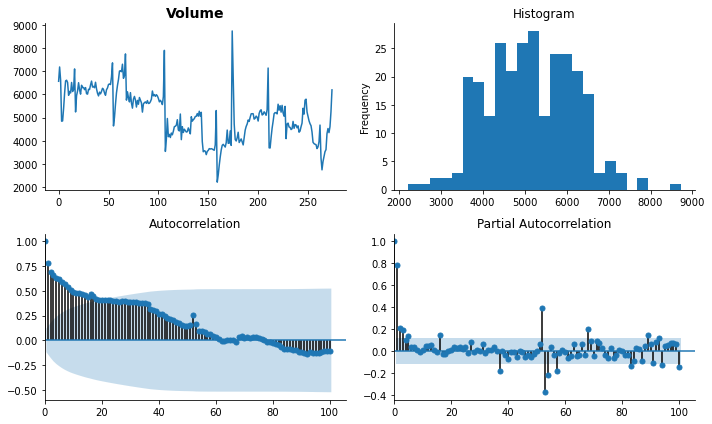

In [31]:
tsplot(mcv_dig_250g['Volume'].dropna(), title=mcv_dig_250g.columns[2], lags=100)


Test Statistic                  -2.635004
p-value                          0.085976
#Lags Used                       4.000000
Number of Observations Used    270.000000
Critical Value (1%)             -3.454804
Critical Value (5%)             -2.872305
Critical Value (10%)            -2.572506
dtype: float64


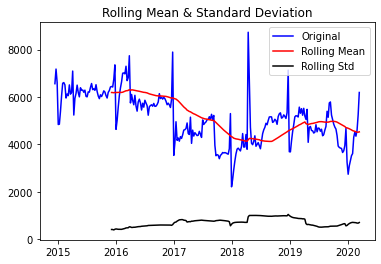

In [32]:
#check stationarity of the original dataset
plot(mcv_dig_250g)

Autocorrelation captures the series itself, and how it correlated with its own path. (yt and yt-1)
a correlation of a variable itself at different time is known as autocorrelation. 

Since we got a relative large p-value, and the test statistic is not able to reject critical values at three levels; thus, we are not able to reject the null, we confirm that our dataset is not stationary.

Large number of time series models require stationarity of the dataset because if the dataset is not stationary, it will hard for the model to capture the trend, which will affect the accuracy of the future predictions. 

(<matplotlib.axes._subplots.AxesSubplot at 0x7fbe6269e908>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbe625c54e0>)

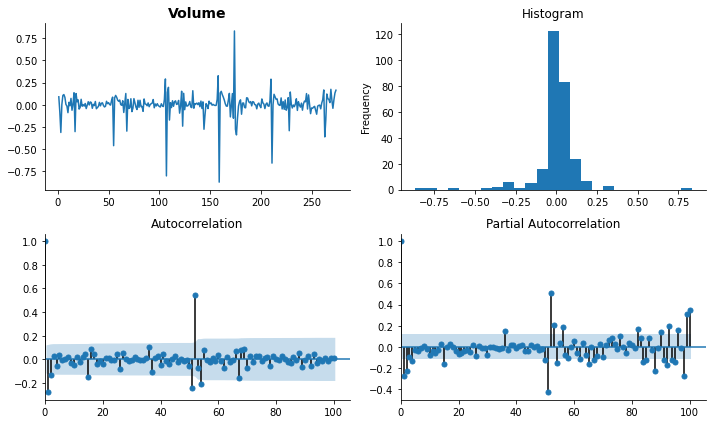

In [33]:
#plot stationary graph
series_transformed=mcv_dig_250g.copy()
series_transformed['Volume_transformed']=np.log(mcv_dig_250g.Volume).diff(1)
tsplot(series_transformed['Volume_transformed'].dropna(), title=mcv_dig_250g.columns[2], lags=100)


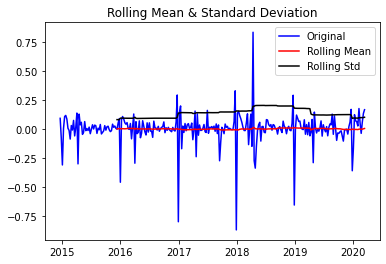

Results of Dickey-Fuller Test:
Test Statistic                -1.158473e+01
p-value                        2.885889e-21
#Lags Used                     3.000000e+00
Number of Observations Used    2.700000e+02
Critical Value (1%)           -3.454804e+00
Critical Value (5%)           -2.872305e+00
Critical Value (10%)          -2.572506e+00
dtype: float64


In [34]:
plot_transform(mcv_dig_250g)

After transforming the dataset into stationary dataset, we see the p-value is extremely small, and the test statistic is smaller than critical values. And the autocorrelation is near zero.

### Modeling Part

      t-1     t+1
0     NaN  6563.0
1  6563.0  7179.8
2  7179.8  6617.0
3  6617.0  4842.8
4  4842.8  4856.0
Test MSE: 211267.523
Test RMSE: 459.638


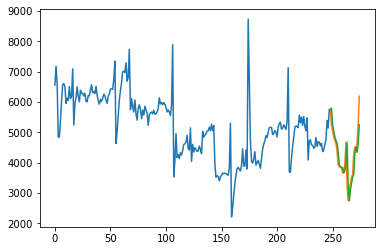

In [35]:
baseline_model(mcv_dig_250g)

When we deal with a time series dataset, we need to check the baseline model before applying any other models. By baseline model, it means we use the value at the previous time step (t-1) to predict the expected outcome at time step at t. It provides a point of reference for all other model techniques.

### Simple Exponential Smoothing model

Observations: 275
Training Observations: 248
Testing Observations: 27


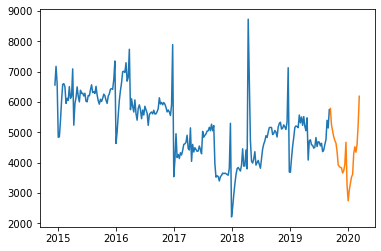

RMSE for Simple Exponential Smoothing α= 0.1 is: 1025.13
RMSE for Simple Exponential Smoothing α= 0.2 is: 1111.98
RMSE for Simple Exponential Smoothing α= 0.30000000000000004 is: 1223.91
RMSE for Simple Exponential Smoothing α= 0.4 is: 1325.87
RMSE for Simple Exponential Smoothing α= 0.5 is: 1411.62
RMSE for Simple Exponential Smoothing α= 0.6000000000000001 is: 1482.4
RMSE for Simple Exponential Smoothing α= 0.7000000000000001 is: 1541.89
RMSE for Simple Exponential Smoothing α= 0.8 is: 1594.44
RMSE for Simple Exponential Smoothing α= 0.9 is: 1644.37


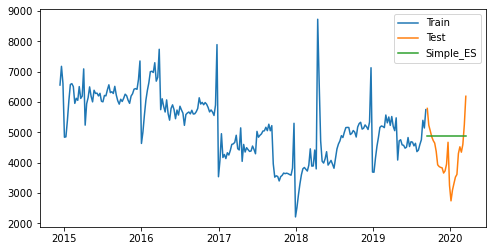

In [36]:
ses_model(mcv_dig_250g)

Simple exponential smoothing: forecast future values using a weighted average of all previous values in the series.
Exponential smoothing is an intuitive forecasting method that weights the observed time series unequally. Recent observations are weighted more heavily than remote observations.

This model does not require stationarity of a dataset, so we apply the model with original data first to see the accuracy. 

### Holt's Linear Model

Holt's linear model can only capture the trend, not seasonality.

Observations: 275
Training Observations: 248
Testing Observations: 27
Min RMSE for Holt Linear Forecasting α= 0.1 and β= 0.1 is: 898.02


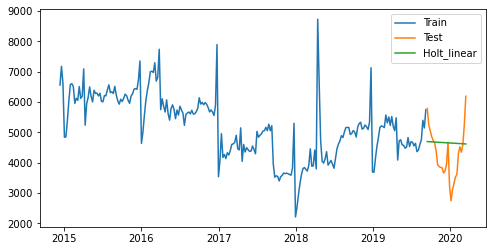

In [37]:
holt_linear_model(mcv_dig_250g)

### Re-apply the model by removing the seasonality through log & diff12

Observations: 275
Training Observations: 236
Testing Observations: 27


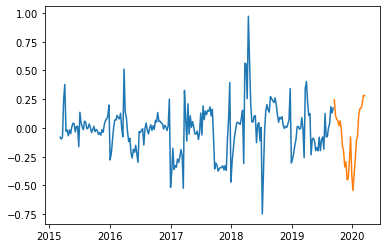

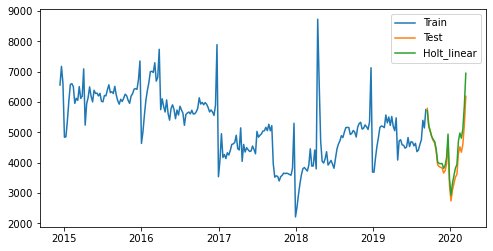

RMSE for Holt Linear Forecasting with transformation is: 300.3142933943039


In [38]:
holt_linear_model_log(mcv_dig_250g)

### Holt-Winter Model

This model can capture both trend and seasonlity.

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency W-SAT will be used.

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency W-SAT will be used.

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency W-SAT will be used.

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency W-SAT will be used.

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency W-SAT will be used.

/opt/anaconda/envs/Python3/lib/python3.6/site

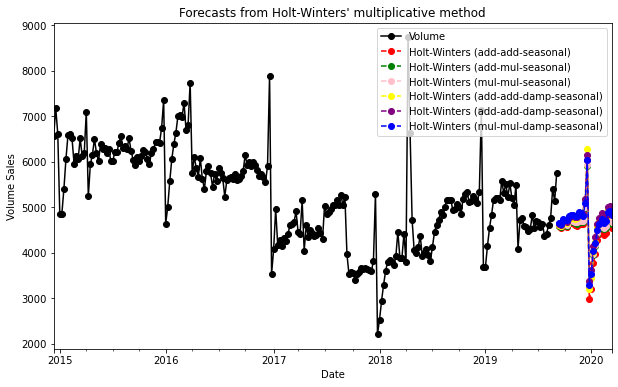

RMSE for Holt-winter are:
738.3146078051575
760.9937934489673
772.0592571493253
834.4485704482979
854.9074044463467
820.796024557044


In [39]:
holt_winter_model(mcv_dig_250g)

Tried all three models with original value/unstationary dataset (without transformation). We can see that the RMSE is actually getting smaller. 

From Simple exponential smoothing: 1012
to Holt's linear: 898
to Holt Winter's: 738.

This can prove that holt winter's is the one that can capture more information than they other two models.

We also apply stationary data (after taking log and differencing) on holt's linear model. We get a small RMSE. Even though the exponential smoothing series models do not require stationarity, but non-stationary dataset results can be misleading, and it is essential to have stationary dataset for the model to capture the information.

### Prophet Model

Facebook developed an open sourcing Prophet. Facebook provides prophet model not only can take care of some outliers/unusual values, but also it can take care of missing values. It is almost able to fully automatically forecast the trend of the future time series. 

Prophet can deal with missing observations or large outliers, and can roll with the punches in relation to product launches or marketing pushes.

Built in Stan, which is really fast.

Prophet needs a very specific kind of dataframe for it to work on. What we need is:

Date column as ds & Value column as y.

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


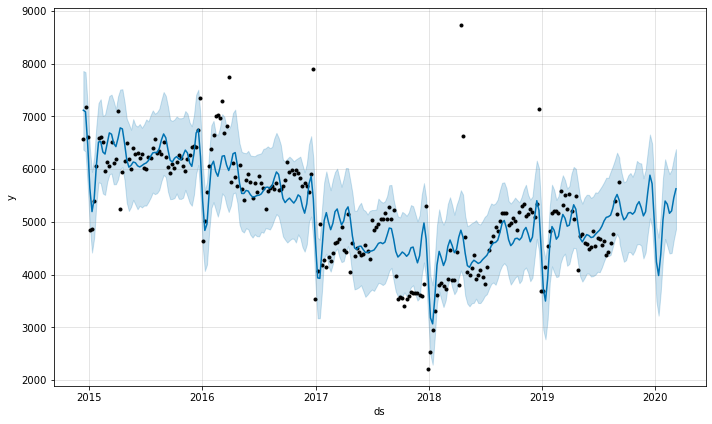

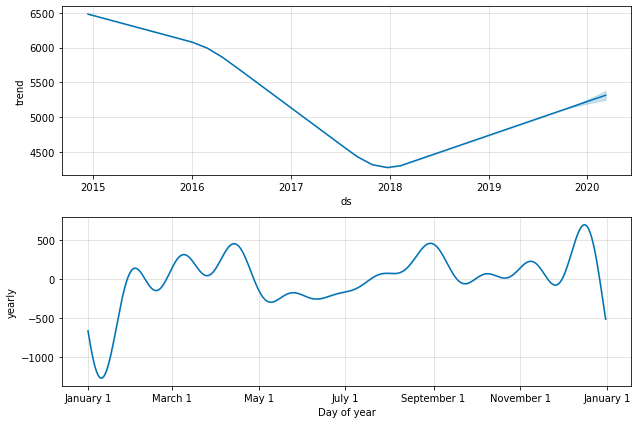

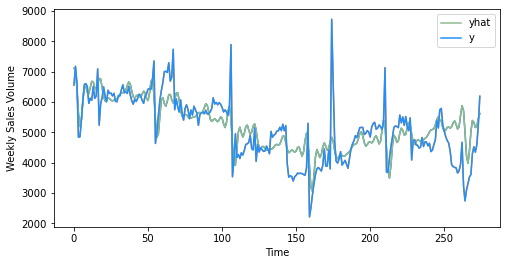

RMSE for prophet model is: 672.2974462631968


In [40]:
prophet_model(mcv_dig_250g)

The default mode for the prophet model is linear growth, we need to make some adjustments for that. 

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


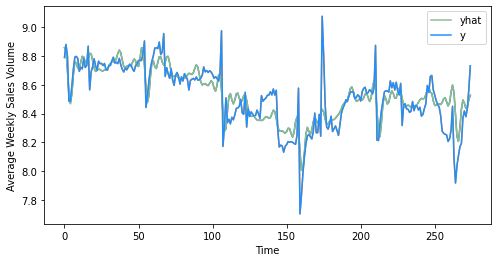

RMSE for prophet model after transformation is: 591.1066304834704


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:44: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [41]:
prophet_model_log(mcv_dig_250g)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0                                        New Year's Day
1                           New Year Holiday [Scotland]
2                New Year Holiday [Scotland] (Observed)
3                  St. Patrick's Day [Northern Ireland]
4                                           Good Friday
5      Easter Monday [England, Wales, Northern Ireland]
6                                               May Day
7                                   Spring Bank Holiday
8                Battle of the Boyne [Northern Ireland]
9                        Summer Bank Holiday [Scotland]
10    Late Summer Bank Holiday [England, Wales, Nort...
11                          St. Andrew's Day [Scotland]
12                                        Christmas Day
13                             Christmas Day (Observed)
14                                           Boxing Day
15    New Year Holiday [Scotland], New Year's Day (O...
16      St. Patrick's Day [Northern Ireland] (Observed)
17                                Boxing Day (Ob

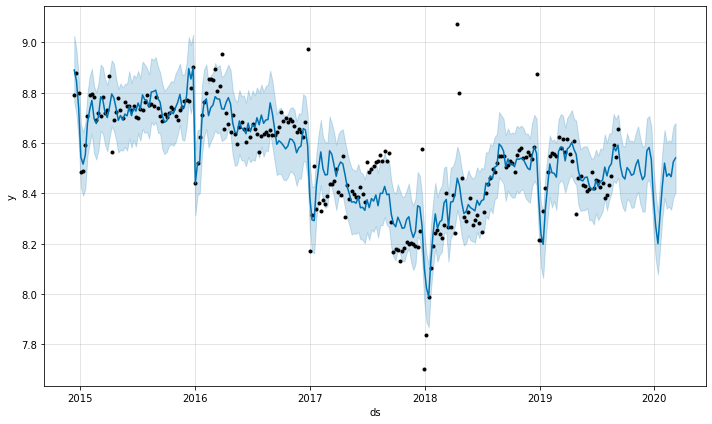

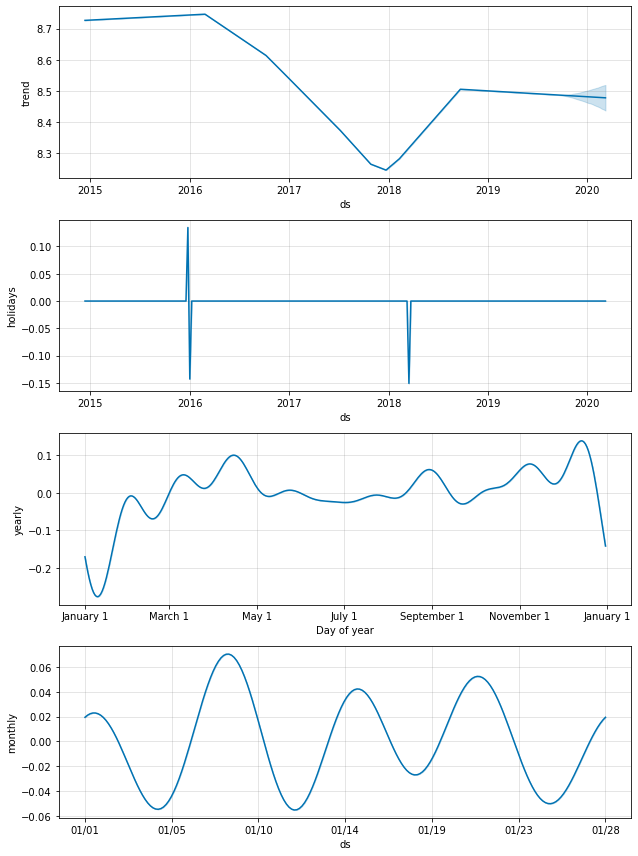

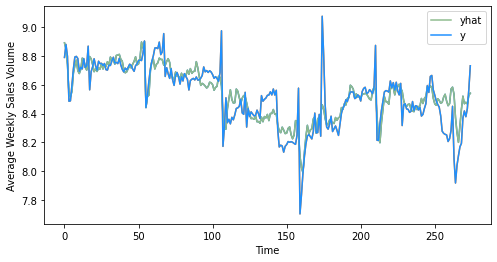

RMSE for prophet with transformation and holiday is: 575.6591508815495


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:52: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:53: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:54: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [42]:
prophet_log_season(mcv_dig_250g)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


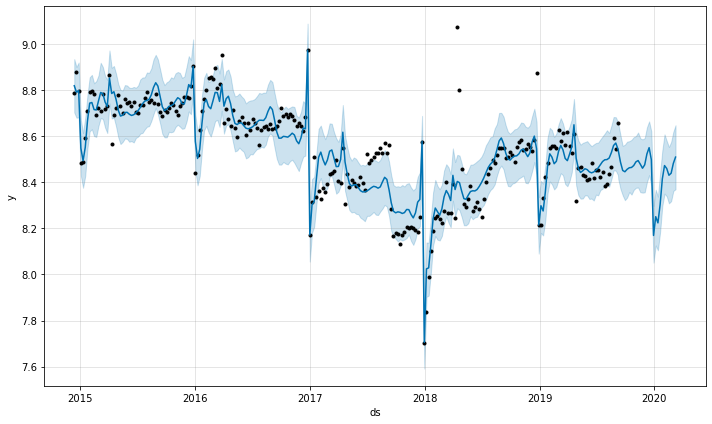

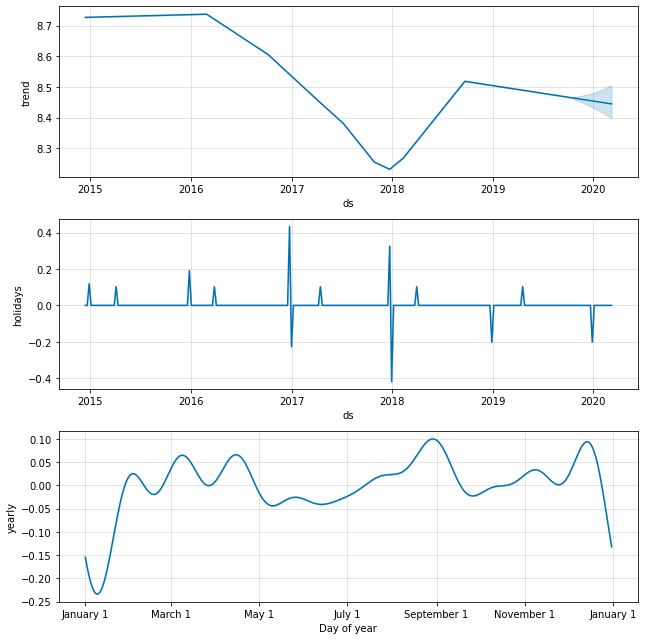

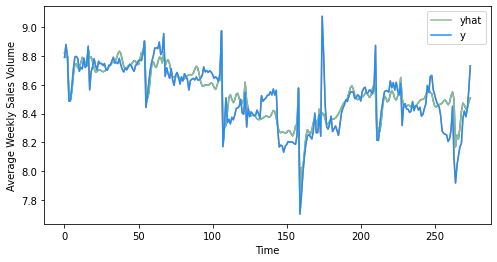

524.3503896336273


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:49: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [43]:
prophet_log_two_holiday(mcv_dig_250g)

### Variables Analysis

In [65]:
mcv_dig_250g=pd.read_excel("Tesco Large/Tesco Large MCVTS DGSTVS 250G SNGL.xlsx")
mcv_dig_400g=pd.read_excel("Tesco others/new-Tesco Large MCVTS DGSTVS 400G SNGL.xlsx")
mcv_dig_400g_twin=pd.read_excel("Tesco others/new-Tesco Large MCVTS DGSTVS 400G 2PACK.xlsx")
mcv_rt_300g=pd.read_excel("Tesco Large/Tesco Large RCH T MCVTS RCH T PLN 300 GM SNGL.xlsx")
mcv_rt_300g_twin=pd.read_excel("Tesco Large/Tesco Large RCH T MCVTS RCH T PLN 300 GM 2 PCK.xlsx")


In [66]:
def trend_var(x):
    x=x[:275]
    date_time = x['SDESC'].str[3:]
    date_time=pd.to_datetime(date_time, format='%d.%m.%y')
    x['SDESC']=date_time
    x.rename(columns={'SDESC':'Date'}, inplace=True)
    x.index=x.index+1
    df=x[['Date','Volume']]
    df=df.set_index('Date')
    return df

mcv_dig_250g=data(mcv_dig_250g)
mcv_dig_400g=data(mcv_dig_400g)
mcv_dig_400g_twin=data(mcv_dig_400g_twin)
mcv_rt_300g=data(mcv_rt_300g)
mcv_rt_300g_twin=data(mcv_rt_300g_twin)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of mcv_dig_250g')

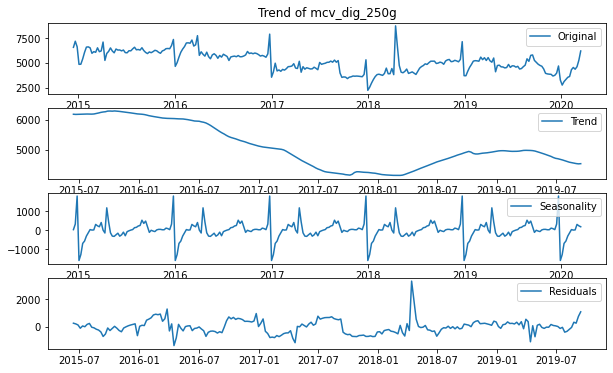

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of mcv_dig_400g')

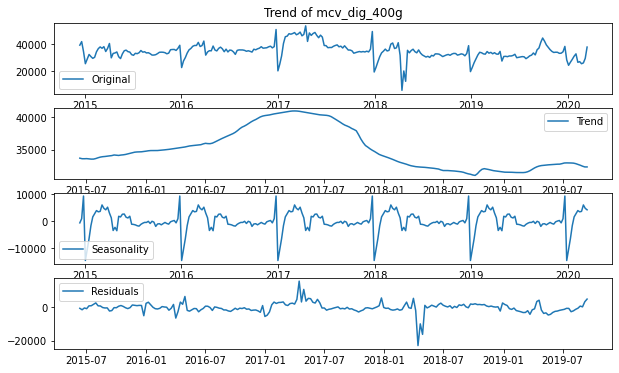

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of mcv_dig_400g_twin')

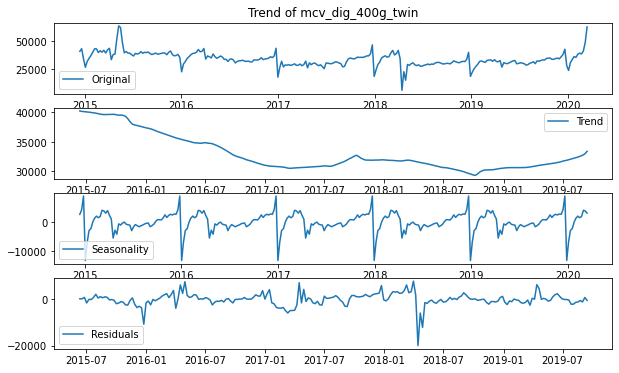

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of mcv_rt_300g')

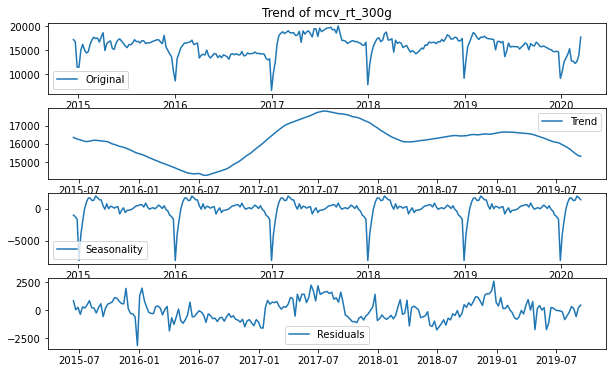

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of mcv_rt_300g_twin')

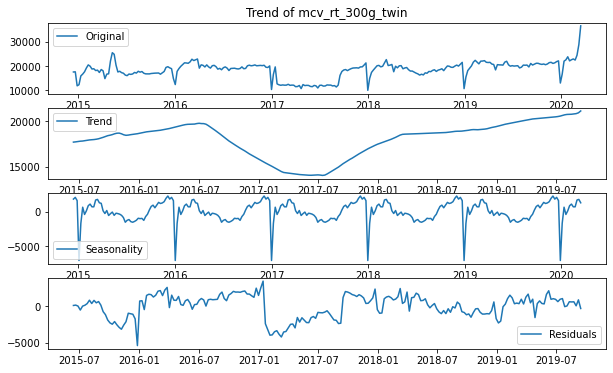

In [67]:
#decomposition for pladis products
from statsmodels.tsa.seasonal import seasonal_decompose

mcv_list=[mcv_dig_250g,mcv_dig_400g,mcv_dig_400g_twin,mcv_rt_300g,mcv_rt_300g_twin]
mcv_name=['mcv_dig_250g','mcv_dig_400g','mcv_dig_400g_twin','mcv_rt_300g','mcv_rt_300g_twin']


i=0
for df in mcv_list:
    decomposition=seasonal_decompose(df)
    
    trend=decomposition.trend
    seasonal=decomposition.seasonal
    residual=decomposition.resid
    
    plt.figure(figsize=(10,6))
    plt.subplot(411)
    plt.plot(df, label='Original')
    plt.legend(loc='best')
    plt.title('Trend of ' + mcv_name[i] )
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.show()
    i=i+1


In [68]:
#把自己产品和我们产品放在一起比较trend
#competitors products
tes_dig_400g=pd.read_excel("Tesco Large/Tesco Large (own label) TSC DGSTVS PLN 400 GM SNGL.xlsx")
tes_mill_400g=pd.read_excel("Tesco Large/Tesco Large (own label) 'TSC-MS-MLL'S-DGSTV-BSCTS PLN 400 GM SNGL.xlsx")
tes_rt_250g=pd.read_excel("Tesco Large/Tesco Large (own label) RCH T TSC RCH T FNGRS PLN 250 GM SNGL.xlsx")
tes_rt_300g=pd.read_excel("Tesco Large/Tesco Large (own label) RCH T TSC RCH T PLN 300 GM SNGL.xlsx")
# tes_rt_300g_missing=pd.read_excel("Tesco Large/missing - Tesco Large (own label) RCH T TSC RCH T PLN 300 GM SNGL.xlsx")


In [69]:
#competitors' products
tes_dig_400g=data(tes_dig_400g)
tes_mill_400g=data(tes_mill_400g)
tes_rt_250g=data(tes_rt_250g)
tes_rt_300g=data(tes_rt_300g)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_dig_400g')

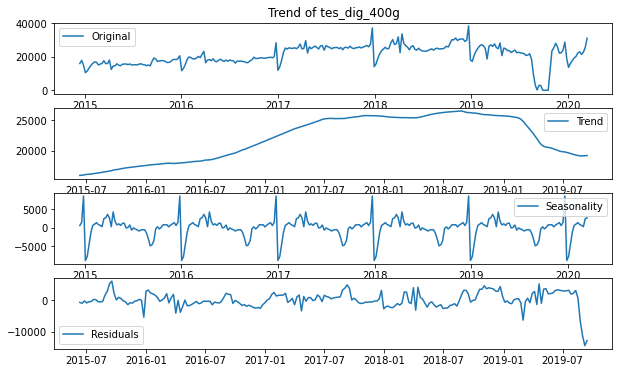

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_mill_400g')

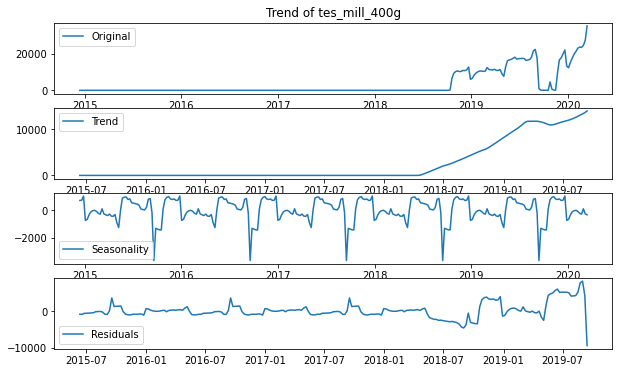

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_250g')

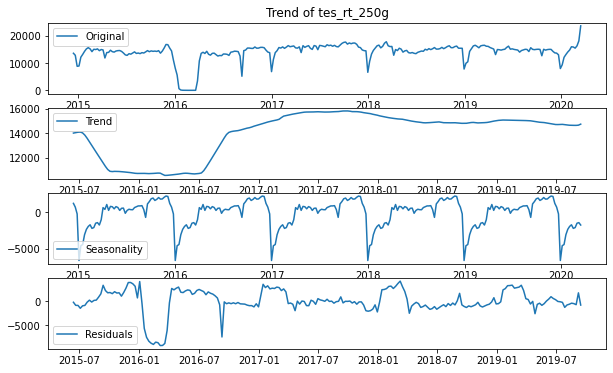

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_300g')

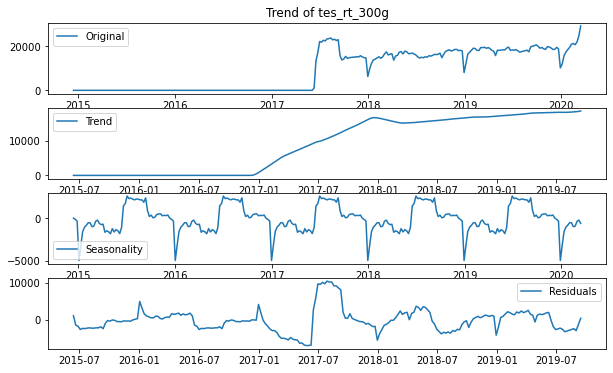

In [70]:
#decompose competitors' products trends
from statsmodels.tsa.seasonal import seasonal_decompose

tes_list=[tes_dig_400g,tes_mill_400g,tes_rt_250g,tes_rt_300g]
tes_name=['tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g']

i=0
for df in tes_list:
    decomposition=seasonal_decompose(df)
    
    trend=decomposition.trend
    seasonal=decomposition.seasonal
    residual=decomposition.resid
    
    plt.figure(figsize=(10,6))
    plt.subplot(411)
    plt.plot(df, label='Original')
    plt.legend(loc='best')
    plt.title('Trend of ' + tes_name[i] )
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.show()
    i=i+1

#### Compare trends with Pladis product and competitors' product

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of mcv_dig_250g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_dig_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_mill_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_250g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_300g')

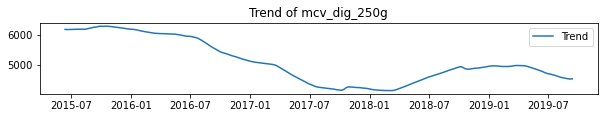

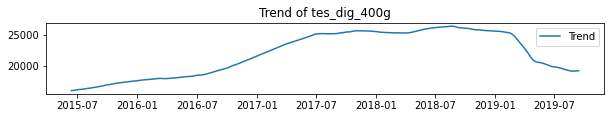

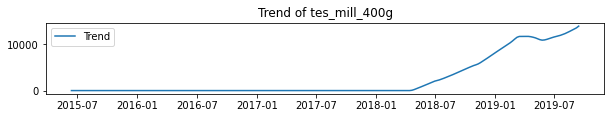

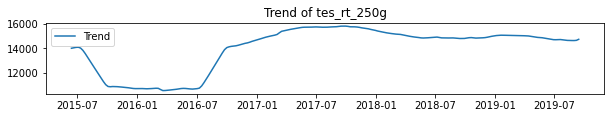

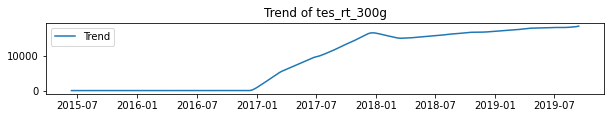

In [71]:
mcv_dig_250g_competitor=[mcv_dig_250g,tes_dig_400g,tes_mill_400g,tes_rt_250g,tes_rt_300g]
mcv_dig_250g_competitor_list=['mcv_dig_250g','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g']
mcv_dig_400g_competitor=[mcv_dig_400g,tes_dig_400g,tes_mill_400g,tes_rt_250g,tes_rt_300g]
mcv_dig_400g_competitor_list=['mcv_dig_400g','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g']
mcv_dig_400g_twin_competitor=[mcv_dig_400g_twin,tes_dig_400g,tes_mill_400g,tes_rt_250g,tes_rt_300g]
mcv_dig_400g_twin_competitor_list=['mcv_dig_400g_twin','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g']
mcv_rt_300g_competitor=[mcv_rt_300g,tes_dig_400g,tes_mill_400g,tes_rt_250g,tes_rt_300g]
mcv_rt_300g_competitor_list=['mcv_rt_300g','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g']
mcv_rt_300g_twin_competitor=[mcv_rt_300g_twin,tes_dig_400g,tes_mill_400g,tes_rt_250g,tes_rt_300g]
mcv_rt_300g_twin_competitor_list=['mcv_rt_300g_twin','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g']

product_name=['mcv_dig_250g','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g',
             'mcv_dig_400g','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g',
              'mcv_dig_400g_twin','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g',
              'mcv_rt_300g','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g',
              'mcv_rt_300g_twin','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g'
             ]

i=0
for product in mcv_dig_250g_competitor:
    decomposition=seasonal_decompose(product)
    trend_1=decomposition.trend

    plt.figure(figsize=(10,6))
    plt.subplot(412)
    plt.plot(trend_1, label='Trend')
    plt.legend(loc='best')
    plt.title('Trend of ' + mcv_dig_250g_competitor_list[i] )
    i=i+1
    

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of mcv_dig_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_dig_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_mill_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_250g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_300g')

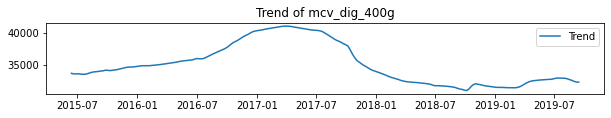

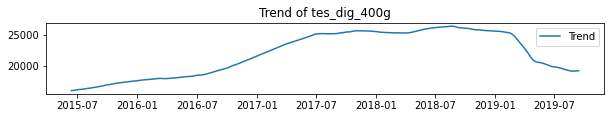

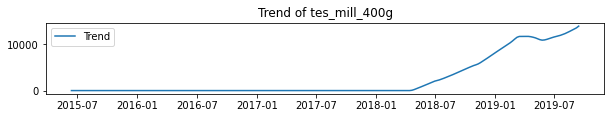

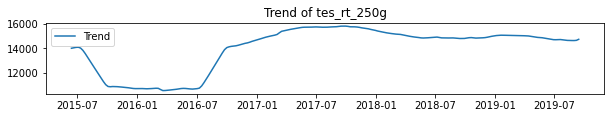

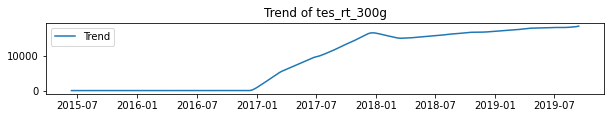

In [72]:
i=0
for product in mcv_dig_400g_competitor:
    decomposition=seasonal_decompose(product)
    trend_2=decomposition.trend

    plt.figure(figsize=(10,6))
    plt.subplot(412)
    plt.plot(trend_2, label='Trend')
    plt.legend(loc='best')
    plt.title('Trend of ' + mcv_dig_400g_competitor_list[i])
    i=i+1

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of mcv_dig_400g_twin')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_dig_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_mill_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_250g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_300g')

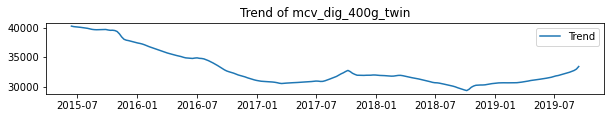

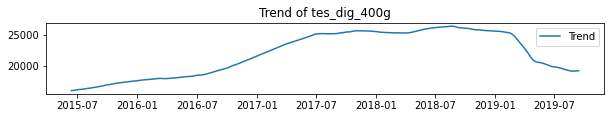

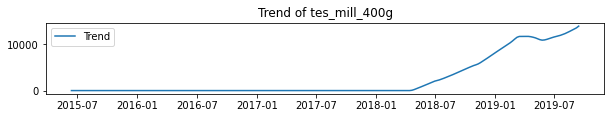

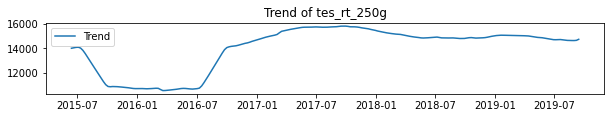

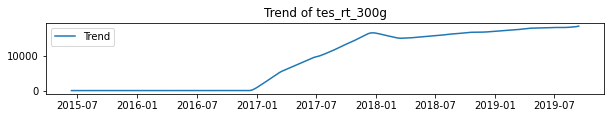

In [73]:
i=0
for product in mcv_dig_400g_twin_competitor:
    decomposition=seasonal_decompose(product)
    trend_3=decomposition.trend

    plt.figure(figsize=(10,6))
    plt.subplot(412)
    plt.plot(trend_3, label='Trend')
    plt.legend(loc='best')
    plt.title('Trend of ' + mcv_dig_400g_twin_competitor_list[i])
    i=i+1

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of mcv_rt_300g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_dig_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_mill_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_250g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_300g')

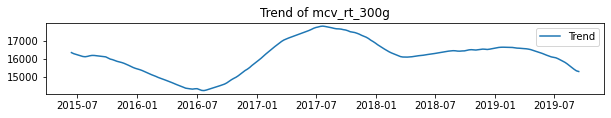

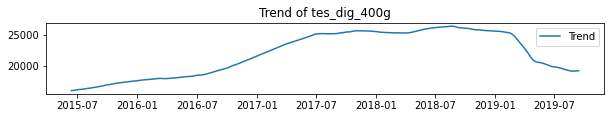

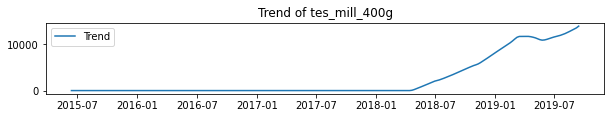

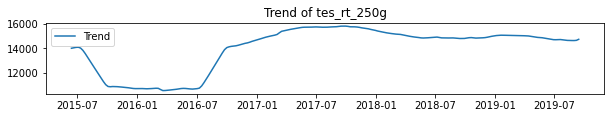

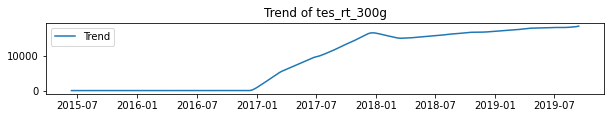

In [74]:
i=0
for product in mcv_rt_300g_competitor:
    decomposition=seasonal_decompose(product)
    trend_4=decomposition.trend

    plt.figure(figsize=(10,6))
    plt.subplot(412)
    plt.plot(trend_4, label='Trend')
    plt.legend(loc='best')
    plt.title('Trend of ' + mcv_rt_300g_competitor_list[i])
    i=i+1

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of mcv_rt_300g_twin')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_dig_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_mill_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_250g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_300g')

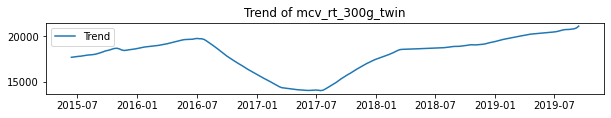

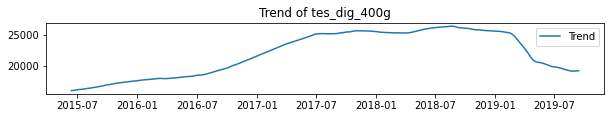

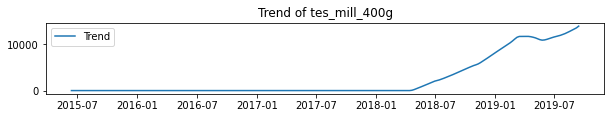

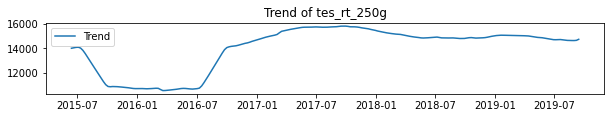

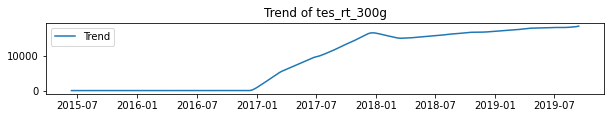

In [75]:
i=0
for product in mcv_rt_300g_twin_competitor:
    decomposition=seasonal_decompose(product)
    trend_5=decomposition.trend

    plt.figure(figsize=(10,6))
    plt.subplot(412)
    plt.plot(trend_5, label='Trend')
    plt.legend(loc='best')
    plt.title('Trend of ' + mcv_rt_300g_twin_competitor_list[i])
    i=i+1

In [76]:
decomposition_1=seasonal_decompose(mcv_dig_250g)
trend_1=decomposition_1.trend
trend_1=trend_1.to_frame()

comp_decomposition_1=seasonal_decompose(tes_dig_400g)
comp_trend1=comp_decomposition_1.trend
comp_trend1=comp_trend1.to_frame()

comp_decomposition_2=seasonal_decompose(tes_mill_400g)
comp_trend2=comp_decomposition_2.trend
comp_trend2=comp_trend2.to_frame()

comp_decomposition_3=seasonal_decompose(tes_rt_250g)
comp_trend3=comp_decomposition_3.trend
comp_trend3=comp_trend3.to_frame()

comp_decomposition_4=seasonal_decompose(tes_rt_300g)
comp_trend4=comp_decomposition_4.trend
comp_trend4=comp_trend4.to_frame()

mcv_dig_250g=pd.merge(trend_1,comp_trend1, how='left', on='Date')
mcv_dig_250g=pd.merge(mcv_dig_250g,comp_trend2, how='left', on='Date')
mcv_dig_250g=pd.merge(mcv_dig_250g,comp_trend3, how='left', on='Date')
mcv_dig_250g=pd.merge(mcv_dig_250g,comp_trend4, how='left', on='Date')
mcv_dig_250g.columns=['trend', 'competitor_trend1','competitor_trend2','competitor_trend3','competitor_trend4']

mcv_dig_250g.corr()

,trend,competitor_trend1,competitor_trend2,competitor_trend3,competitor_trend4
trend,1.000000,-0.866579,-0.230873,-0.886110,-0.808293
competitor_trend1,-0.866579,1.000000,0.102433,0.791993,0.744211
competitor_trend2,-0.230873,0.102433,1.000000,0.280281,0.649001
competitor_trend3,-0.886110,0.791993,0.280281,1.000000,0.718884
competitor_trend4,-0.808293,0.744211,0.649001,0.718884,1.000000


In [77]:
decomposition_2=seasonal_decompose(mcv_dig_400g)
trend_2=decomposition_2.trend
trend_2=trend_2.to_frame()

comp_decomposition_1=seasonal_decompose(tes_dig_400g)
comp_trend1=comp_decomposition_1.trend
comp_trend1=comp_trend1.to_frame()

comp_decomposition_2=seasonal_decompose(tes_mill_400g)
comp_trend2=comp_decomposition_2.trend
comp_trend2=comp_trend2.to_frame()

comp_decomposition_3=seasonal_decompose(tes_rt_250g)
comp_trend3=comp_decomposition_3.trend
comp_trend3=comp_trend3.to_frame()

comp_decomposition_4=seasonal_decompose(tes_rt_300g)
comp_trend4=comp_decomposition_4.trend
comp_trend4=comp_trend4.to_frame()

mcv_400g_comp=pd.merge(trend_2,comp_trend1, how='left', on='Date')
mcv_400g_comp=pd.merge(mcv_400g_comp,comp_trend2, how='left', on='Date')
mcv_400g_comp=pd.merge(mcv_400g_comp,comp_trend3, how='left', on='Date')
mcv_400g_comp=pd.merge(mcv_400g_comp,comp_trend4, how='left', on='Date')
mcv_400g_comp.columns=['trend', 'competitor_trend1','competitor_trend2','competitor_trend3','competitor_trend4']

mcv_400g_comp.corr()

,trend,competitor_trend1,competitor_trend2,competitor_trend3,competitor_trend4
trend,1.000000,-0.079756,-0.543329,0.073859,-0.518553
competitor_trend1,-0.079756,1.000000,0.102433,0.791993,0.744211
competitor_trend2,-0.543329,0.102433,1.000000,0.280281,0.649001
competitor_trend3,0.073859,0.791993,0.280281,1.000000,0.718884
competitor_trend4,-0.518553,0.744211,0.649001,0.718884,1.000000


In [78]:
decomposition_3=seasonal_decompose(mcv_dig_400g_twin)
trend_3=decomposition_3.trend
trend_3=trend_3.to_frame()

comp_decomposition_1=seasonal_decompose(tes_dig_400g)
comp_trend1=comp_decomposition_1.trend
comp_trend1=comp_trend1.to_frame()

comp_decomposition_2=seasonal_decompose(tes_mill_400g)
comp_trend2=comp_decomposition_2.trend
comp_trend2=comp_trend2.to_frame()

comp_decomposition_3=seasonal_decompose(tes_rt_250g)
comp_trend3=comp_decomposition_3.trend
comp_trend3=comp_trend3.to_frame()

comp_decomposition_4=seasonal_decompose(tes_rt_300g)
comp_trend4=comp_decomposition_4.trend
comp_trend4=comp_trend4.to_frame()

mcv_dig_400g_twin_comp=pd.merge(trend_3,comp_trend1, how='left', on='Date')
mcv_dig_400g_twin_comp=pd.merge(mcv_dig_400g_twin_comp,comp_trend2, how='left', on='Date')
mcv_dig_400g_twin_comp=pd.merge(mcv_dig_400g_twin_comp,comp_trend3, how='left', on='Date')
mcv_dig_400g_twin_comp=pd.merge(mcv_dig_400g_twin_comp,comp_trend4, how='left', on='Date')
mcv_dig_400g_twin_comp.columns=['trend', 'competitor_trend1','competitor_trend2','competitor_trend3','competitor_trend4']

mcv_dig_400g_twin_comp.corr()

,trend,competitor_trend1,competitor_trend2,competitor_trend3,competitor_trend4
trend,1.000000,-0.838641,-0.348160,-0.767722,-0.692132
competitor_trend1,-0.838641,1.000000,0.102433,0.791993,0.744211
competitor_trend2,-0.348160,0.102433,1.000000,0.280281,0.649001
competitor_trend3,-0.767722,0.791993,0.280281,1.000000,0.718884
competitor_trend4,-0.692132,0.744211,0.649001,0.718884,1.000000


In [79]:
decomposition_4=seasonal_decompose(mcv_rt_300g)
trend_4=decomposition_4.trend
trend_4=trend_4.to_frame()

comp_decomposition_1=seasonal_decompose(tes_dig_400g)
comp_trend1=comp_decomposition_1.trend
comp_trend1=comp_trend1.to_frame()

comp_decomposition_2=seasonal_decompose(tes_mill_400g)
comp_trend2=comp_decomposition_2.trend
comp_trend2=comp_trend2.to_frame()

comp_decomposition_3=seasonal_decompose(tes_rt_250g)
comp_trend3=comp_decomposition_3.trend
comp_trend3=comp_trend3.to_frame()

comp_decomposition_4=seasonal_decompose(tes_rt_300g)
comp_trend4=comp_decomposition_4.trend
comp_trend4=comp_trend4.to_frame()

mcv_rt_300g_comp=pd.merge(trend_4,comp_trend1, how='left', on='Date')
mcv_rt_300g_comp=pd.merge(mcv_rt_300g_comp,comp_trend2, how='left', on='Date')
mcv_rt_300g_comp=pd.merge(mcv_rt_300g_comp,comp_trend3, how='left', on='Date')
mcv_rt_300g_comp=pd.merge(mcv_rt_300g_comp,comp_trend4, how='left', on='Date')
mcv_rt_300g_comp.columns=['trend', 'competitor_trend1','competitor_trend2','competitor_trend3','competitor_trend4']


mcv_rt_300g_comp.corr()

,trend,competitor_trend1,competitor_trend2,competitor_trend3,competitor_trend4
trend,1.000000,0.675009,0.083125,0.760581,0.561392
competitor_trend1,0.675009,1.000000,0.102433,0.791993,0.744211
competitor_trend2,0.083125,0.102433,1.000000,0.280281,0.649001
competitor_trend3,0.760581,0.791993,0.280281,1.000000,0.718884
competitor_trend4,0.561392,0.744211,0.649001,0.718884,1.000000


In [80]:
#mcv_rt_300g_twin trend correlation
decomposition_5=seasonal_decompose(mcv_rt_300g_twin)
trend_5=decomposition_5.trend
trend_5=trend_5.to_frame()

comp_decomposition_1=seasonal_decompose(tes_dig_400g)
comp_trend1=comp_decomposition_1.trend
comp_trend1=comp_trend1.to_frame()

comp_decomposition_2=seasonal_decompose(tes_mill_400g)
comp_trend2=comp_decomposition_2.trend
comp_trend2=comp_trend2.to_frame()

comp_decomposition_3=seasonal_decompose(tes_rt_250g)
comp_trend3=comp_decomposition_3.trend
comp_trend3=comp_trend3.to_frame()

comp_decomposition_4=seasonal_decompose(tes_rt_300g)
comp_trend4=comp_decomposition_4.trend
comp_trend4=comp_trend4.to_frame()

mcv_rt_300g_twin_comp=pd.merge(trend_5,comp_trend1, how='left', on='Date')
mcv_rt_300g_twin_comp=pd.merge(mcv_rt_300g_twin_comp,comp_trend2, how='left', on='Date')
mcv_rt_300g_twin_comp=pd.merge(mcv_rt_300g_twin_comp,comp_trend3, how='left', on='Date')
mcv_rt_300g_twin_comp=pd.merge(mcv_rt_300g_twin_comp,comp_trend4, how='left', on='Date')
mcv_rt_300g_twin_comp.columns=['trend', 'competitor_trend1','competitor_trend2','competitor_trend3','competitor_trend4']

mcv_rt_300g_twin_comp.corr()

,trend,competitor_trend1,competitor_trend2,competitor_trend3,competitor_trend4
trend,1.000000,-0.299945,0.598838,-0.394315,0.222567
competitor_trend1,-0.299945,1.000000,0.102433,0.791993,0.744211
competitor_trend2,0.598838,0.102433,1.000000,0.280281,0.649001
competitor_trend3,-0.394315,0.791993,0.280281,1.000000,0.718884
competitor_trend4,0.222567,0.744211,0.649001,0.718884,1.000000


## Machine Learning Model

In [81]:
mcv_dig_250g=pd.read_excel("Tesco Large/Tesco Large MCVTS DGSTVS 250G SNGL.xlsx")
mcv_dig_400g=pd.read_excel("Tesco others/new-Tesco Large MCVTS DGSTVS 400G SNGL.xlsx")
mcv_dig_400g_twin=pd.read_excel("Tesco others/new-Tesco Large MCVTS DGSTVS 400G 2PACK.xlsx")
mcv_rt_300g=pd.read_excel("Tesco Large/Tesco Large RCH T MCVTS RCH T PLN 300 GM SNGL.xlsx")
mcv_rt_300g_twin=pd.read_excel("Tesco Large/Tesco Large RCH T MCVTS RCH T PLN 300 GM 2 PCK.xlsx")

tesco_digs400g=pd.read_excel("Tesco Large/Tesco Large (own label) TSC DGSTVS PLN 400 GM SNGL.xlsx")
tesco_molly400g=pd.read_excel("Tesco Large/Tesco Large (own label) 'TSC-MS-MLL'S-DGSTV-BSCTS PLN 400 GM SNGL.xlsx")
tesco_RT250g=pd.read_excel("Tesco Large/Tesco Large (own label) RCH T TSC RCH T FNGRS PLN 250 GM SNGL.xlsx")
tesco_RT300g=pd.read_excel("Tesco Large/Tesco Large (own label) RCH T TSC RCH T PLN 300 GM SNGL.xlsx")


In [60]:
#extract own product variables
def variables(x):
    x=x[:275]
    date_time = x['SDESC'].str[3:]
    date_time=pd.to_datetime(date_time, format='%d.%m.%y')
    x['SDESC']=date_time
    x.rename(columns={'SDESC':'Date'}, inplace=True)
    x=x.set_index('Date')
    x=x[['Volume','£/kg','Distribution','Promotional Distribution']]
    return x

mcv_dig_250g=variables(mcv_dig_250g)
mcv_dig_400g=variables(mcv_dig_400g)
mcv_dig_400g_twin=variables(mcv_dig_400g_twin)
mcv_rt_300g=variables(mcv_rt_300g)
mcv_rt_300g_twin=variables(mcv_rt_300g_twin)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
def comp_variables(x):
    x=x[:275]
    date_time = x['SDESC'].str[3:]
    date_time=pd.to_datetime(date_time, format='%d.%m.%y')
    x['SDESC']=date_time
    x.rename(columns={'SDESC':'Date'}, inplace=True)
    x=x.set_index('Date')
    x=x[['£/kg','Distribution']]
    return x

tesco_RT250g=comp_variables(tesco_RT250g)
tesco_molly400g=comp_variables(tesco_molly400g)
tesco_RT300g=comp_variables(tesco_RT300g)
tesco_digs400g=comp_variables(tesco_digs400g)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
# each variable with their competitors
# merge own product variables with four competitors' variables

In [63]:
# compose competitors' variables as a list

competitor_list=[tesco_RT250g, tesco_molly400g, tesco_RT300g, tesco_digs400g]

variable_columns=['Volume','£/kg','Distribution','Promotional Distribution',
                   'tesco_RT250g_price_kg', 'tesco_RT250g_distribution',
                   'tesco_molly400g_price_kg','tesco_molly400g_distribution',
                   'tesco_RT300g_price_kg','tesco_RT300g_distribution',
                   'tesco_digs400g_price_kg','tesco_dig400g_distribution'
                  ]

In [64]:
# mcv_dig_250g product
for variable in competitor_list:
    mcv_dig_250g=mcv_dig_250g.merge(variable, how='left', on='Date')
    mcv_dig_250g_with_comp=mcv_dig_250g
    
mcv_dig_250g_with_comp.columns=variable_columns
mcv_dig_250g_with_comp.head()

,Volume,£/kg,Distribution,Promotional Distribution,tesco_RT250g_price_kg,tesco_RT250g_distribution,tesco_molly400g_price_kg,tesco_molly400g_distribution,tesco_RT300g_price_kg,tesco_RT300g_distribution,tesco_digs400g_price_kg,tesco_dig400g_distribution
Date,,,,,,,,,,,,
2014-12-13,6563.0,3.560262,97,0,2.000897,98,0.0,0,0.0,0,1.475527,99
2014-12-20,7179.8,3.560043,97,0,2.000794,98,0.0,0,0.0,0,1.475431,99
2014-12-27,6617.0,3.560118,97,0,2.000896,98,0.0,0,0.0,0,1.475346,99
2015-01-03,4842.8,3.560110,97,0,2.000998,98,0.0,0,0.0,0,1.475504,99
2015-01-10,4856.0,3.559761,97,0,2.001020,98,0.0,0,0.0,0,1.475625,99


In [65]:
# mcv_dig_400g product
for variable in competitor_list:
    mcv_dig_400g=mcv_dig_400g.merge(variable, how='left', on='Date')
    mcv_dig_400g_with_comp=mcv_dig_400g
    
mcv_dig_400g_with_comp.columns=variable_columns
mcv_dig_400g_with_comp.head()

,Volume,£/kg,Distribution,Promotional Distribution,tesco_RT250g_price_kg,tesco_RT250g_distribution,tesco_molly400g_price_kg,tesco_molly400g_distribution,tesco_RT300g_price_kg,tesco_RT300g_distribution,tesco_digs400g_price_kg,tesco_dig400g_distribution
Date,,,,,,,,,,,,
2014-12-13,39173.5,2.032399,100,0,2.000897,98,0.0,0,0.0,0,1.475527,99
2014-12-20,41784.0,2.033989,100,0,2.000794,98,0.0,0,0.0,0,1.475431,99
2014-12-27,34446.5,2.042324,100,0,2.000896,98,0.0,0,0.0,0,1.475346,99
2015-01-03,25516.0,2.040269,100,0,2.000998,98,0.0,0,0.0,0,1.475504,99
2015-01-10,28874.5,2.039523,100,0,2.001020,98,0.0,0,0.0,0,1.475625,99


In [66]:
#mcv_dig_400g_twin product
for variable in competitor_list:
    mcv_dig_400g_twin=mcv_dig_400g_twin.merge(variable, how='left', on='Date')
    mcv_dig_400g_twin_with_comp=mcv_dig_400g_twin
    
mcv_dig_400g_twin_with_comp.columns=variable_columns
mcv_dig_400g_twin_with_comp.head()


,Volume,£/kg,Distribution,Promotional Distribution,tesco_RT250g_price_kg,tesco_RT250g_distribution,tesco_molly400g_price_kg,tesco_molly400g_distribution,tesco_RT300g_price_kg,tesco_RT300g_distribution,tesco_digs400g_price_kg,tesco_dig400g_distribution
Date,,,,,,,,,,,,
2014-12-13,40945.0,1.889672,96,0,2.000897,98,0.0,0,0.0,0,1.475527,99
2014-12-20,43265.0,1.889613,96,0,2.000794,98,0.0,0,0.0,0,1.475431,99
2014-12-27,34195.0,1.889703,96,0,2.000896,98,0.0,0,0.0,0,1.475346,99
2015-01-03,26667.0,1.889601,96,0,2.000998,98,0.0,0,0.0,0,1.475504,99
2015-01-10,31957.0,1.889689,96,0,2.001020,98,0.0,0,0.0,0,1.475625,99


In [67]:
#mcv_rt_300g product
for variable in competitor_list:
    mcv_rt_300g=mcv_rt_300g.merge(variable, how='left', on='Date')
    mcv_rt_300g_with_comp=mcv_rt_300g
    
mcv_rt_300g_with_comp.columns=variable_columns
mcv_rt_300g_with_comp.head()

,Volume,£/kg,Distribution,Promotional Distribution,tesco_RT250g_price_kg,tesco_RT250g_distribution,tesco_molly400g_price_kg,tesco_molly400g_distribution,tesco_RT300g_price_kg,tesco_RT300g_distribution,tesco_digs400g_price_kg,tesco_dig400g_distribution
Date,,,,,,,,,,,,
2014-12-13,17259.3,3.384627,100,0,2.000897,98,0.0,0,0.0,0,1.475527,99
2014-12-20,16830.9,3.386913,100,0,2.000794,98,0.0,0,0.0,0,1.475431,99
2014-12-27,11520.9,3.399665,100,0,2.000896,98,0.0,0,0.0,0,1.475346,99
2015-01-03,11492.4,3.396514,100,0,2.000998,98,0.0,0,0.0,0,1.475504,99
2015-01-10,15084.9,3.396960,100,0,2.001020,98,0.0,0,0.0,0,1.475625,99


In [68]:
#mcv_rt_300g_twin product
for variable in competitor_list:
    mcv_rt_300g_twin=mcv_rt_300g_twin.merge(variable, how='left', on='Date')
    mcv_rt_300g_twin_with_comp=mcv_rt_300g_twin
    
mcv_rt_300g_twin_with_comp.columns=variable_columns
mcv_rt_300g_twin_with_comp.head()

,Volume,£/kg,Distribution,Promotional Distribution,tesco_RT250g_price_kg,tesco_RT250g_distribution,tesco_molly400g_price_kg,tesco_molly400g_distribution,tesco_RT300g_price_kg,tesco_RT300g_distribution,tesco_digs400g_price_kg,tesco_dig400g_distribution
Date,,,,,,,,,,,,
2014-12-13,17512,3.15,96,0,2.000897,98,0.0,0,0.0,0,1.475527,99
2014-12-20,17578,3.15,96,0,2.000794,98,0.0,0,0.0,0,1.475431,99
2014-12-27,11776,3.15,96,0,2.000896,98,0.0,0,0.0,0,1.475346,99
2015-01-03,12239,3.15,96,0,2.000998,98,0.0,0,0.0,0,1.475504,99
2015-01-10,15878,3.15,96,0,2.001020,98,0.0,0,0.0,0,1.475625,99


In [69]:
# var_list=[mcv_dig_250g_with_comp,mcv_dig_400g_with_comp,mcv_dig_400g_twin_with_comp,mcv_rt_300g_with_comp,mcv_rt_300g_twin_with_comp]

# var_name=['mcv_dig_250g_with_comp','mcv_dig_400g_with_comp','mcv_dig_400g_twin_with_comp','mcv_rt_300g_with_comp','mcv_rt_300g_twin_with_comp']

# final_var_list=[mcv_dig_250g_with_comp_X,mcv_dig_250g_with_comp_y,
#                mcv_dig_400g_with_comp_X,mcv_dig_400g_with_comp_y,
#                mcv_dig_400g_twin_with_comp_X, mcv_dig_400g_twin_with_comp_y,
#                 mcv_rt_300g_with_comp_X, mcv_rt_300g_with_comp_y,
#                 mcv_rt_300g_twin_with_comp_X, mcv_rt_300g_twin_with_comp_y
#                ]


### Random Forest Regressor

In [70]:
def input_var(var):
#     for var in final_var_list:
    X=var[['£/kg','Distribution','Promotional Distribution',
               'tesco_RT250g_price_kg', 'tesco_RT250g_distribution',
               'tesco_molly400g_price_kg','tesco_molly400g_distribution',
               'tesco_RT300g_price_kg','tesco_RT300g_distribution',
               'tesco_digs400g_price_kg','tesco_dig400g_distribution'
              ]].values
    y=var['Volume'].values
    return X,y


In [71]:
#train test split
from sklearn.model_selection import TimeSeriesSplit

def rf_regressor(X, y):
    splits = TimeSeriesSplit(n_splits=5)

    for train_index, test_index in splits.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        print('Observations: %d' % (len(train_index) + len(test_index)))
        print('Training Observations: %d' % (len(train_index))) 
        print('Testing Observations: %d' % (len(test_index))) 
        from sklearn.preprocessing import StandardScaler

        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        from sklearn.ensemble import RandomForestRegressor
        from sklearn.model_selection import cross_val_score

        regressor = RandomForestRegressor(n_estimators=20, random_state=0)
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        print(cross_val_score(regressor, X_train, y_train, cv=splits))

        from sklearn import metrics

        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

    #     x_len=len(train_index)
    #     mcv_dig_250g_with_comp['pred_volume']=""
    #     mcv_dig_250g_with_comp['pred_volume'][x_len:]=y_pred

    #     plt.figure(figsize=(23,8))


    #     plt.plot(X, label='Train')
    #     plt.plot(y, label='Test')
    #     plt.plot(mcv_dig_250g_with_comp['pred_volume'], label='Random Forest Predicted Sales')
    #     plt.title('Random Forest Predicted Result', size = 30)
    #     plt.ylabel('Sales',size=20)
    #     plt.xlabel('Date',size=20)
    #     plt.legend(loc='best')
    #     plt.show()

        #feature importance
        df_featImp = pd.DataFrame({'features':['£/kg','Distribution','Promotional Distribution',
                   'tesco_RT250g_price_kg', 'tesco_RT250g_distribution',
                   'tesco_molly400g_price_kg','tesco_molly400g_distribution',
                   'tesco_RT300g_price_kg','tesco_RT300g_distribution',
                   'tesco_digs400g_price_kg','tesco_dig400g_distribution'], 'importance': regressor.feature_importances_})
        df_featImp = df_featImp.sort_values('importance').reset_index(drop=True)

        plt.figure()
        df_featImp.plot(kind='barh', x='features', y='importance', title="Feature Importance for Volume Sales",legend=False, figsize=(15, 8))

In [72]:
mcv_dig_250g_input_X,mcv_dig_250g_input_Y=input_var(mcv_dig_250g_with_comp)

### XGBoost Model

In [73]:
!pip3 install xgboost
from xgboost import XGBRegressor
import xgboost as xgb
# from sklearn.metrics import mean_squared_error


In [74]:
def xgb_regressor(X, y):
    splits = TimeSeriesSplit(n_splits=5)
    
    for train_index, test_index in splits.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        print('Observations: %d' % (len(train_index) + len(test_index)))
        print('Training Observations: %d' % (len(train_index))) 
        print('Testing Observations: %d' % (len(test_index))) 
        from sklearn.preprocessing import StandardScaler


        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)

        from sklearn.ensemble import RandomForestRegressor
        from sklearn.model_selection import cross_val_score

        xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                    max_depth = 5, alpha = 10, n_estimators = 10)
        xg_reg.fit(X_train, y_train)
        y_pred = xg_reg.predict(X_test)
        print(cross_val_score(xg_reg, X_train, y_train, cv=splits))

        from sklearn import metrics

        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

        #feature importance
        df_featImp = pd.DataFrame({'features':['£/kg','Distribution','Promotional Distribution',
                   'tesco_RT250g_price_kg', 'tesco_RT250g_distribution',
                   'tesco_molly400g_price_kg','tesco_molly400g_distribution',
                   'tesco_RT300g_price_kg','tesco_RT300g_distribution',
                   'tesco_digs400g_price_kg','tesco_dig400g_distribution'], 'importance': xg_reg.feature_importances_})
        df_featImp = df_featImp.sort_values('importance').reset_index(drop=True)

        plt.figure()
        df_featImp.plot(kind='barh', x='features', y='importance', title="Feature Importance for Volume Sales",legend=False, figsize=(15, 8))


In [75]:
mcv_dig_250g_input_X,mcv_dig_250g_input_Y=input_var(mcv_dig_250g_with_comp)

Observations: 95
Training Observations: 50
Testing Observations: 45
[ -24.36660605 -179.94110363 -177.70218356 -165.29860866 -393.72484754]
Mean Absolute Error: 2052.784255642361
Mean Squared Error: 4627035.692311929
Root Mean Squared Error: 2151.0545535415713
Observations: 140
Training Observations: 95
Testing Observations: 45
[-216.74630327 -208.62801786   -9.97761757  -11.23228496  -83.25051602]
Mean Absolute Error: 995.2630544704864
Mean Squared Error: 1558977.7777402156
Root Mean Squared Error: 1248.5903162127343
Observations: 185
Training Observations: 140
Testing Observations: 45
[-188.69966672  -11.62619037  -94.4306298    -1.7378747   -29.98864394]
Mean Absolute Error: 816.7211046006947
Mean Squared Error: 1595530.615974293
Root Mean Squared Error: 1263.1431494388485
Observations: 230
Training Observations: 185
Testing Observations: 45
[-16.92462279 -14.78037312  -1.47901431  -4.34456971  -1.3296428 ]
Mean Absolute Error: 2290.087717013889
Mean Squared Error: 5566816.813846777

<Figure size 432x288 with 0 Axes>

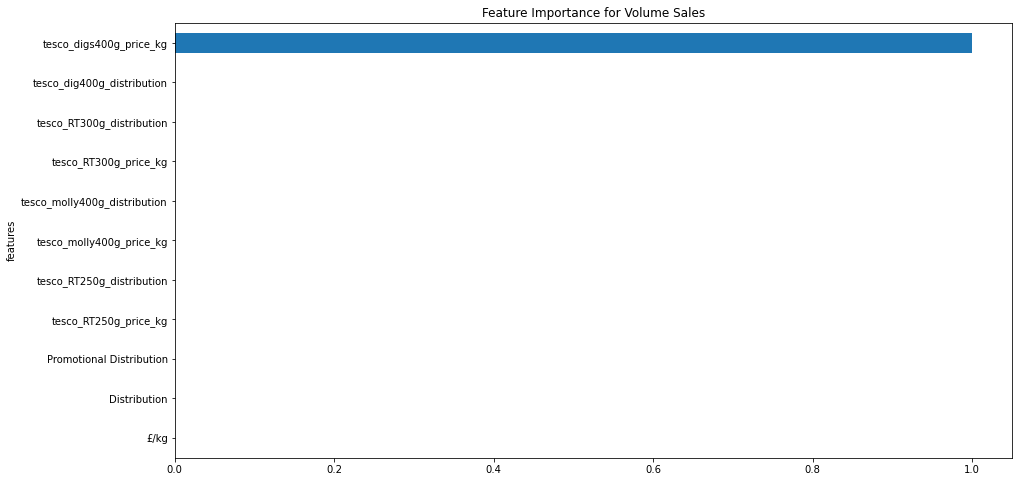

<Figure size 432x288 with 0 Axes>

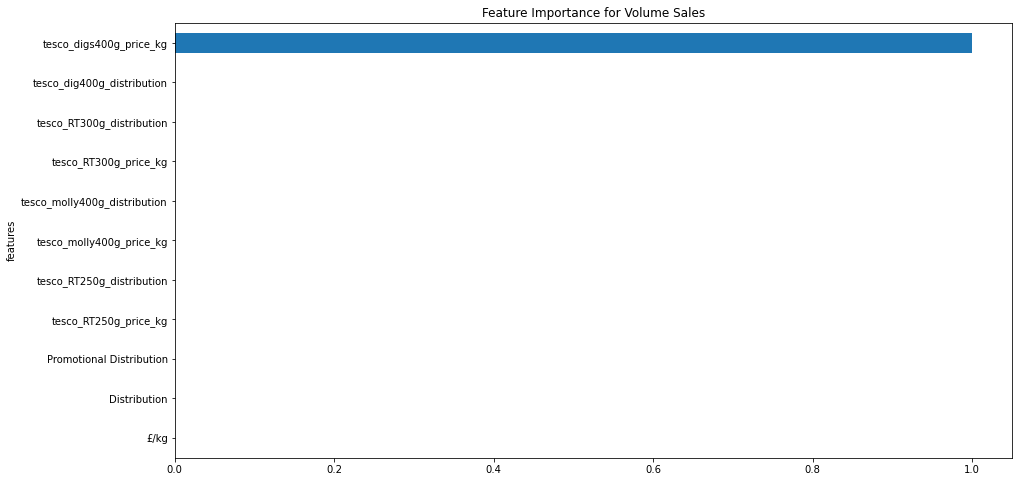

<Figure size 432x288 with 0 Axes>

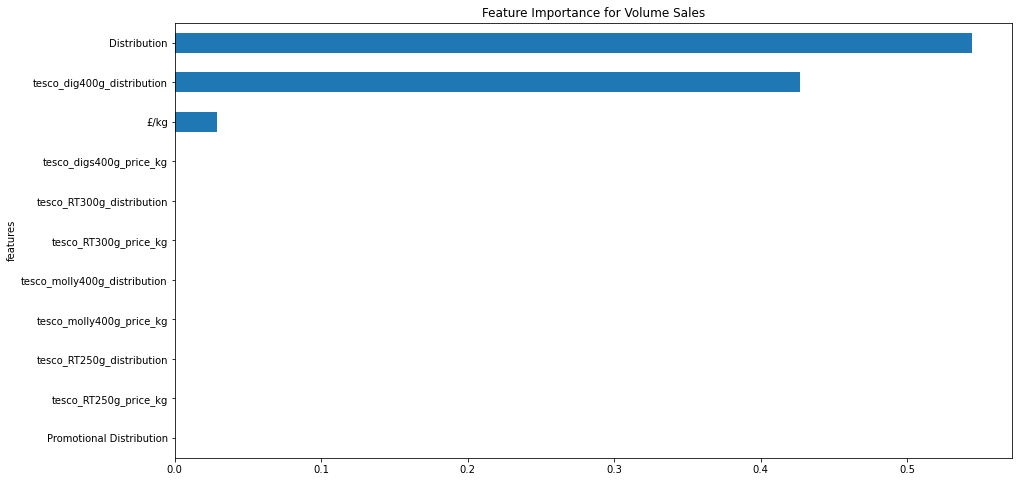

<Figure size 432x288 with 0 Axes>

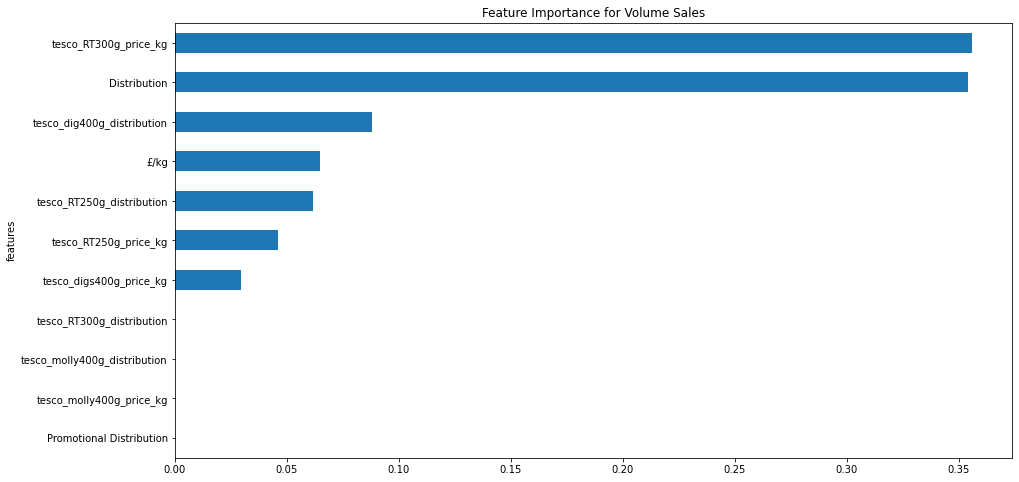

<Figure size 432x288 with 0 Axes>

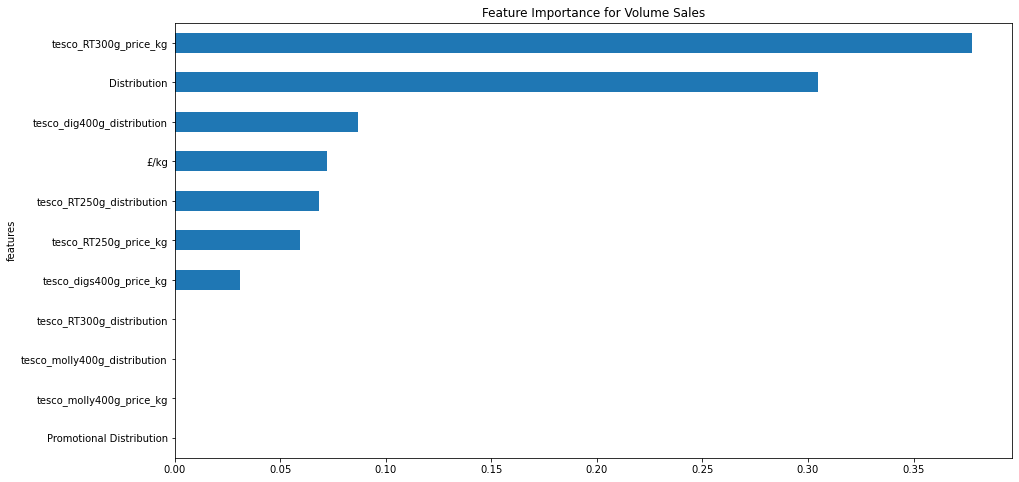

In [76]:
xgb_regressor(mcv_dig_250g_input_X,mcv_dig_250g_input_Y)

### LSTM model

#### Univariate LSTM - Baseline Model

In [77]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from pandas import DataFrame
from pandas import concat
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it wi

In [78]:
mcv_dig_250g=pd.read_excel("Tesco Large/Tesco Large MCVTS DGSTVS 250G SNGL.xlsx")

def data(x):
    x=x[:275]
    date_time = x['SDESC'].str[3:]
    date_time=pd.to_datetime(date_time, format='%d.%m.%y')
    x['SDESC']=date_time
    x.rename(columns={'SDESC':'Date'}, inplace=True)
    x.index=x.index+1
    df=x[['Date','Volume']]
    df=df.set_index('Date')
    return df

mcv_dig_250g=data(mcv_dig_250g)


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
mcv_dig_250g.head()

,Volume
Date,
2014-12-13,6563.0
2014-12-20,7179.8
2014-12-27,6617.0
2015-01-03,4842.8
2015-01-10,4856.0


In [80]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    if i == 0:
        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
  # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
# load dataset
#dataset = read_csv('pollution.csv', header=0, index_col=0)
values = mcv_dig_250g.values
# integer encode direction
#encoder = LabelEncoder()
#values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
# reframed.drop(reframed.columns[[5,6,7]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)   var1(t)
1   0.667107  0.761780
2   0.761780  0.675395
3   0.675395  0.403070
4   0.403070  0.405096
5   0.405096  0.487751


In [81]:
# split into train and test sets
values = reframed.values
train = values[:248]
test = values[248:]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


(248, 1, 1) (248,) (26, 1, 1) (26,)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 248 samples, validate on 26 samples


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
248/248 - 1s - loss: 0.4556 - val_loss: 0.2911
Epoch 2/50
248/248 - 0s - loss: 0.4419 - val_loss: 0.2781
Epoch 3/50
248/248 - 0s - loss: 0.4277 - val_loss: 0.2645
Epoch 4/50
248/248 - 0s - loss: 0.4127 - val_loss: 0.2500
Epoch 5/50
248/248 - 0s - loss: 0.3966 - val_loss: 0.2344
Epoch 6/50
248/248 - 0s - loss: 0.3792 - val_loss: 0.2173
Epoch 7/50
248/248 - 0s - loss: 0.3600 - val_loss: 0.1996
Epoch 8/50
248/248 - 0s - loss: 0.3389 - val_loss: 0.1802
Epoch 9/50
248/248 - 0s - loss: 0.3152 - val_loss: 0.1584
Epoch 10/50
248/248 - 0s - loss: 0.2890 - val_loss: 0.1373
Epoch 11/50
248/248 - 0s - loss: 0.2598 - val_loss: 0.1152
Epoch 12/50
248/248 - 0s - loss: 0.2276 - val_loss: 0.0939
Epoch 13/50
248/248 - 0s - loss: 0.1945 - val_loss: 0.0823
Epoch 14/50
248/248 - 0s - loss: 0.1629 - val_loss: 0.0794
Epoch 15/50
248/248 - 0s - loss: 0.1335 - val_loss: 0.0846
Epoch 00015: early stopping


<Figure size 1656x1080 with 0 Axes>

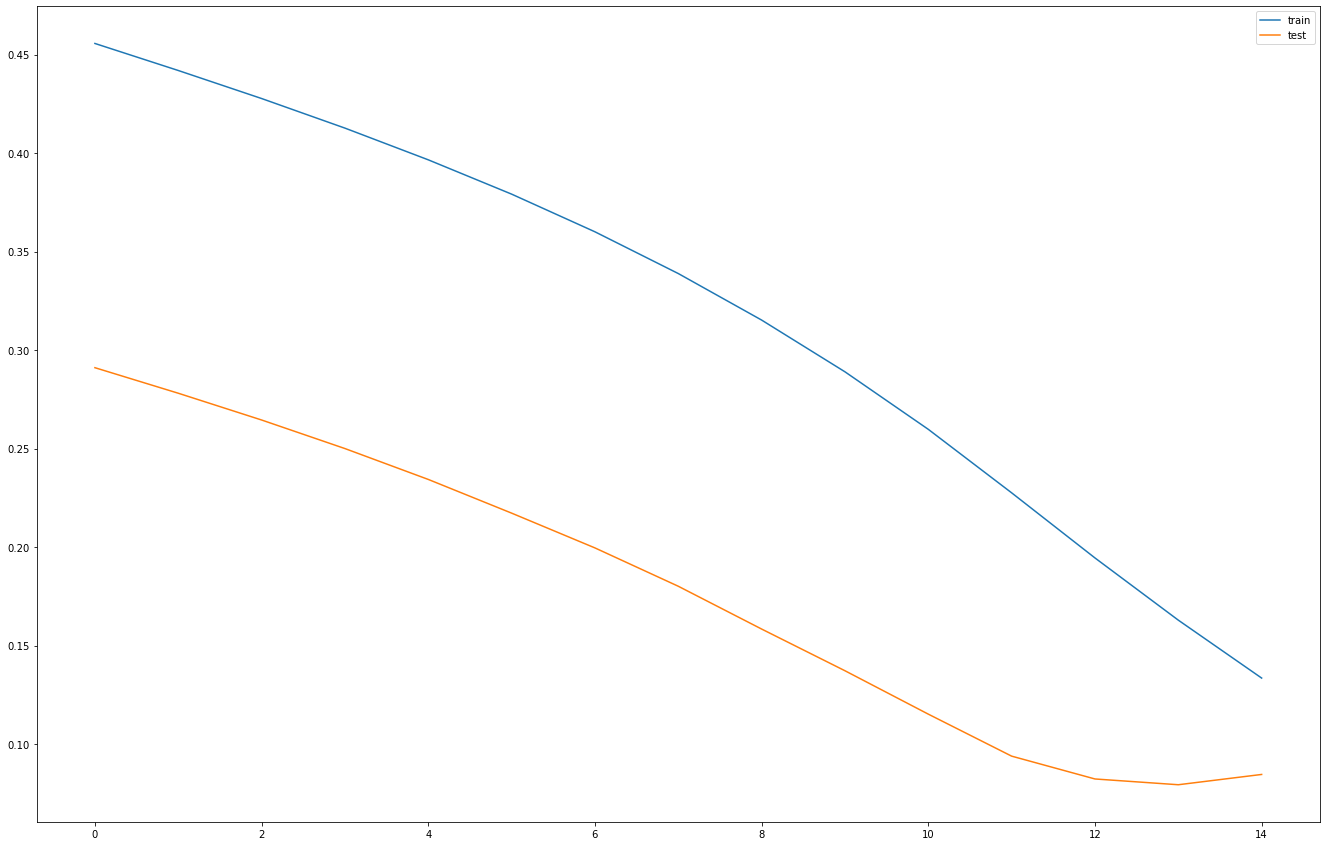

In [82]:
# design network

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(25))
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False, callbacks=[earlystopping])
# plot history
plt.figure(figsize=(23, 15))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [83]:
from numpy import concatenate

yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 702.546


#### Multivariate LSTM - Without Competitors' Variables

In [84]:
mcv_dig_250g=pd.read_excel("Tesco Large/Tesco Large MCVTS DGSTVS 250G SNGL.xlsx")

def data(x):
    x=x[:275]
    date_time = x['SDESC'].str[3:]
    date_time=pd.to_datetime(date_time, format='%d.%m.%y')
    x['SDESC']=date_time
    x.rename(columns={'SDESC':'Date'}, inplace=True)
    df=x.set_index('Date')
    df=df.drop(['Units', 'Value', '£/unit'], axis=1)
    return df

mcv_dig_250g=data(mcv_dig_250g)
# values=mcv_dig_250g.values

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    if i == 0:
        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
  # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
# load dataset
#dataset = read_csv('pollution.csv', header=0, index_col=0)
values = mcv_dig_250g.values
# integer encode direction
#encoder = LabelEncoder()
#values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[5,6,7]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)
1   0.667107   0.951219        0.0   0.227363  0.761780
2   0.761780   0.951219        0.0   0.226979  0.675395
3   0.675395   0.951219        0.0   0.227110  0.403070
4   0.403070   0.951219        0.0   0.227096  0.405096
5   0.405096   0.951219        0.0   0.226483  0.487751


In [98]:
# split into train and test sets
values = reframed.values
train = values[:248]
test = values[248:]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(248, 1, 12) (248,) (26, 1, 12) (26,)


Train on 248 samples, validate on 26 samples
Epoch 1/50
248/248 - 1s - loss: 0.4614 - val_loss: 0.2913
Epoch 2/50
248/248 - 0s - loss: 0.4414 - val_loss: 0.2750
Epoch 3/50
248/248 - 0s - loss: 0.4209 - val_loss: 0.2577
Epoch 4/50
248/248 - 0s - loss: 0.3990 - val_loss: 0.2387
Epoch 5/50
248/248 - 0s - loss: 0.3749 - val_loss: 0.2174
Epoch 6/50
248/248 - 0s - loss: 0.3476 - val_loss: 0.1944
Epoch 7/50
248/248 - 0s - loss: 0.3162 - val_loss: 0.1682
Epoch 8/50
248/248 - 0s - loss: 0.2800 - val_loss: 0.1388
Epoch 9/50
248/248 - 0s - loss: 0.2377 - val_loss: 0.1088
Epoch 10/50
248/248 - 0s - loss: 0.1907 - val_loss: 0.0788
Epoch 11/50
248/248 - 0s - loss: 0.1451 - val_loss: 0.0724
Epoch 12/50
248/248 - 0s - loss: 0.1035 - val_loss: 0.0828
Epoch 00012: early stopping


<Figure size 1656x1080 with 0 Axes>

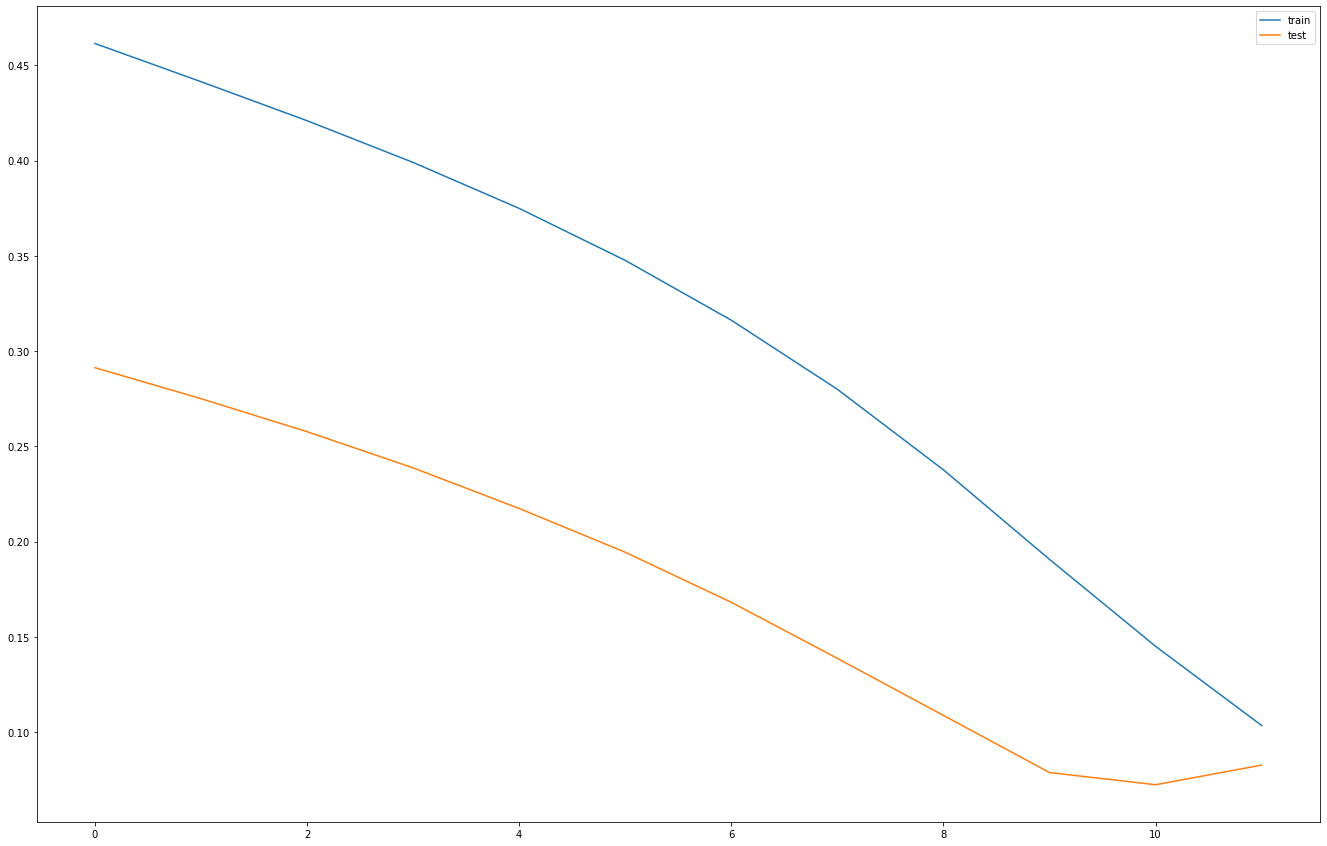

In [87]:
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(25))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False, callbacks=[earlystopping])
# plot history
plt.figure(figsize=(23, 15))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [88]:
# make a prediction
from numpy import concatenate

yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 643.074


### LSTM Multivariate with Competitors'

In [89]:
# mcv_dig_250g=pd.read_excel("Tesco Large/Tesco Large MCVTS DGSTVS 250G SNGL.xlsx")

# def data(x):
#     x=x[:275]
#     date_time = x['SDESC'].str[3:]
#     date_time=pd.to_datetime(date_time, format='%d.%m.%y')
#     x['SDESC']=date_time
#     x.rename(columns={'SDESC':'Date'}, inplace=True)
#     x.index=x.index+1
#     df=x[['Date','Volume']]
#     df=df.set_index('Date')
#     return df

# mcv_dig_250g=data(mcv_dig_250g)

In [ ]:
mcv_dig_250g_with_comp.head()

In [95]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    if i == 0:
        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
  # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
# load dataset
#dataset = read_csv('pollution.csv', header=0, index_col=0)
values = mcv_dig_250g_with_comp.values
# integer encode direction
#encoder = LabelEncoder()
#values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[13,14,15,16,17,18,19,20,21,22,23]], axis=1, inplace=True)
print(reframed.head())



ValueError: could not convert string to float: 

In [96]:
# split into train and test sets
values = reframed.values
train = values[:248]
test = values[248:]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(248, 1, 12) (248,) (26, 1, 12) (26,)


Train on 248 samples, validate on 26 samples
Epoch 1/50
248/248 - 2s - loss: 0.4647 - val_loss: 0.2585
Epoch 2/50
248/248 - 0s - loss: 0.4204 - val_loss: 0.2092
Epoch 3/50
248/248 - 0s - loss: 0.3748 - val_loss: 0.1586
Epoch 4/50
248/248 - 0s - loss: 0.3245 - val_loss: 0.1157
Epoch 5/50
248/248 - 0s - loss: 0.2686 - val_loss: 0.1023
Epoch 6/50
248/248 - 0s - loss: 0.2213 - val_loss: 0.1277
Epoch 00006: early stopping


<Figure size 1656x1080 with 0 Axes>

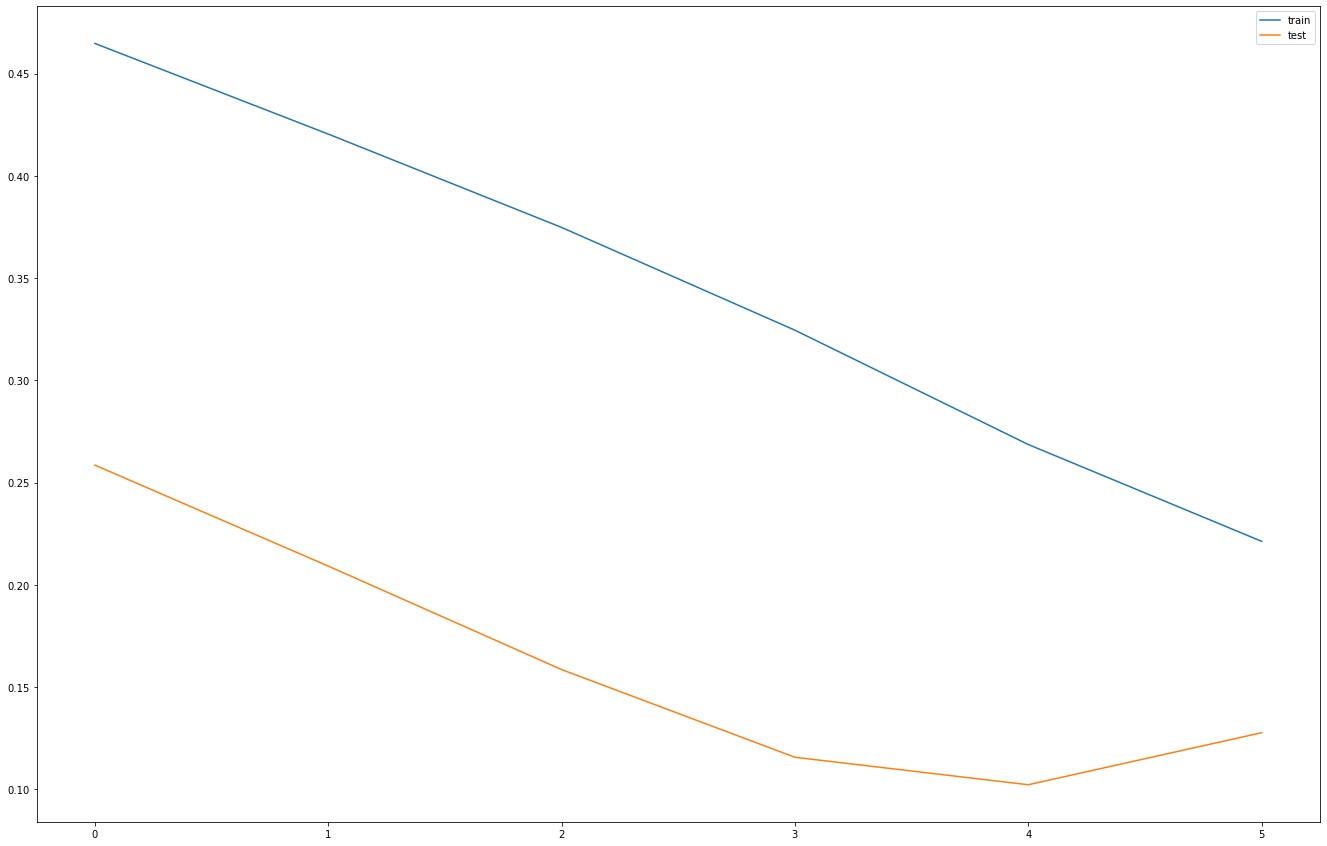

In [97]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(25))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False, callbacks=[earlystopping])
# plot history
plt.figure(figsize=(23, 15))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


In [94]:
from numpy import concatenate

yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

# # calculate RMSE
# x=len(train_X)+1
# mcv_dig_250g_with_comp["Volume_lstm"]=""
# mcv_dig_250g_with_comp["Volume_lstm"][x:]=inv_yhat

# plt.figure(figsize=(23,8))
# plt.plot(values[:248], label='Train')
# plt.plot(values[248:], label='Test')
# plt.plot(mcv_dig_250g_with_comp["Volume_lstm"][x:], label='LSTM Model Predicted Model')
# plt.title('Result of LSTM Model For Sales Volume', size = 30)
# plt.ylabel('Volume',size=20)
# plt.xlabel('Date',size=20)
# plt.legend(loc='best')
# plt.show()


Test RMSE: 949.877


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1656x576 with 0 Axes>

Text(0.5, 1.0, 'Result of LSTM Model For Sales Volume')

Text(0, 0.5, 'Volume')

Text(0.5, 0, 'Date')

ValueError: view limit minimum -36874.9 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

### 这里以上都整理完了

In [ ]:
#数据的突变点
from fbprophet.plot import add_changepoints_to_plot
fig = model_holiday.plot(forecast_holiday)
a = add_changepoints_to_plot(fig.gca(), model_holiday, forecast_holiday)

In [ ]:
# cross validation (不要)
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model_holiday, horizon = '180 days')
df_cv.head()


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')


# Machine Learning

In [ ]:
def data(x):
    x=x[:275]
    date_time = x['SDESC'].str[3:]
    date_time=pd.to_datetime(date_time, format='%d.%m.%y')
    x['SDESC']=date_time
    x.rename(columns={'SDESC':'Date'}, inplace=True)
    x.index=x.index+1
    df=x[['Date','Volume']]
    df=df.set_index('Date')
    return df

#### McVitie's Digestive products decomposition graph

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

mcv_list=[mcv_dig_250g,mcv_dig_400g,mcv_dig_400g_twin,mcv_rt_300g,mcv_rt_300g_twin]

for df in mcv_list:
    decomposition=seasonal_decompose(df)
    
    trend=decomposition.trend
    seasonal=decomposition.seasonal
    residual=decomposition.resid
    
    plt.figure(figsize=(10,6))
    plt.subplot(411)
    plt.plot(df, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.show()

#### Competitors' products decomposition graph

In [ ]:
def data(x):
    x=x[:275]
    date_time = x['SDESC'].str[3:]
    date_time=pd.to_datetime(date_time, format='%d.%m.%y')
    x['SDESC']=date_time
    x.rename(columns={'SDESC':'Date'}, inplace=True)
    x.index=x.index+1
    df=x[['Date','Volume']]
    df=df.set_index('Date')
    return df

In [ ]:
#competitors' products
from statsmodels.tsa.seasonal import seasonal_decompose

tes_list=[tes_dig_400g,tes_mill_400g,tes_rt_250g,tes_rt_300g]

for df in tes_list:
    decomposition=seasonal_decompose(df)
    
    trend=decomposition.trend
    seasonal=decomposition.seasonal
    residual=decomposition.resid
    
    plt.figure(figsize=(10,6))
    plt.subplot(411)
    plt.plot(df, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.show()

#### Compare trends with Pladis product and competitors' product

In [ ]:
mcv_dig_250g_competitor=[mcv_dig_250g,tes_dig_400g,tes_mill_400g,tes_rt_250g,tes_rt_300g]
mcv_dig_250g_competitor_list=['mcv_dig_250g','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g']
mcv_dig_400g_competitor=[mcv_dig_400g,tes_dig_400g,tes_mill_400g,tes_rt_250g,tes_rt_300g]
mcv_dig_400g_competitor_list=['mcv_dig_400g','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g']
mcv_dig_400g_twin_competitor=[mcv_dig_400g_twin,tes_dig_400g,tes_mill_400g,tes_rt_250g,tes_rt_300g]
mcv_dig_400g_twin_competitor_list=['mcv_dig_400g_twin','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g']
mcv_rt_300g_competitor=[mcv_rt_300g,tes_dig_400g,tes_mill_400g,tes_rt_250g,tes_rt_300g]
mcv_rt_300g_competitor_list=['mcv_rt_300g','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g']
mcv_rt_300g_twin_competitor=[mcv_rt_300g_twin,tes_dig_400g,tes_mill_400g,tes_rt_250g,tes_rt_300g]
mcv_rt_300g_twin_competitor_list=['mcv_rt_300g_twin','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g']

product_name=['mcv_dig_250g','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g',
             'mcv_dig_400g','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g',
              'mcv_dig_400g_twin','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g',
              'mcv_rt_300g','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g',
              'mcv_rt_300g_twin','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g'
             ]


In [ ]:
#mcv_dig_250g trend correlation with competitors
i=0
for product in mcv_dig_250g_competitor:
    decomposition=seasonal_decompose(product)
    trend_1=decomposition.trend

    plt.figure(figsize=(10,6))
    plt.subplot(412)
    plt.plot(trend_1, label='Trend')
    plt.legend(loc='best')
    plt.title('Trend of ' + mcv_dig_250g_competitor_list[i] )
    i=i+1

In [ ]:
#mcv_dig_400g trend correlation with competitors
i=0
for product in mcv_dig_400g_competitor:
    decomposition=seasonal_decompose(product)
    trend_2=decomposition.trend

    plt.figure(figsize=(10,6))
    plt.subplot(412)
    plt.plot(trend_2, label='Trend')
    plt.legend(loc='best')
    plt.title('Trend of ' + mcv_dig_400g_competitor_list[i])
    i=i+1

In [ ]:
# mcv_dig_400g_twin trend correlation with competitors
i=0
for product in mcv_dig_400g_twin_competitor:
    decomposition=seasonal_decompose(product)
    trend_3=decomposition.trend

    plt.figure(figsize=(10,6))
    plt.subplot(412)
    plt.plot(trend_3, label='Trend')
    plt.legend(loc='best')
    plt.title('Trend of ' + mcv_dig_400g_twin_competitor_list[i])
    i=i+1

In [ ]:
# mcv_rt_300g trend oorrelation with competitors
i=0
for product in mcv_rt_300g_competitor:
    decomposition=seasonal_decompose(product)
    trend_4=decomposition.trend

    plt.figure(figsize=(10,6))
    plt.subplot(412)
    plt.plot(trend_4, label='Trend')
    plt.legend(loc='best')
    plt.title('Trend of ' + mcv_rt_300g_competitor_list[i])
    i=i+1

In [ ]:
#mcv_rt_300g_twin with competitors
i=0
for product in mcv_rt_300g_twin_competitor:
    decomposition=seasonal_decompose(product)
    trend_5=decomposition.trend

    plt.figure(figsize=(10,6))
    plt.subplot(412)
    plt.plot(trend_5, label='Trend')
    plt.legend(loc='best')
    plt.title('Trend of ' + mcv_rt_300g_twin_competitor_list[i])
    i=i+1

In [ ]:
#mcv_dig_250g trend correlation with competitors
decomposition_1=seasonal_decompose(mcv_dig_250g)
trend_1=decomposition_1.trend
trend_1=trend_1.to_frame()

comp_decomposition_1=seasonal_decompose(tes_dig_400g)
comp_trend1=comp_decomposition_1.trend
comp_trend1=comp_trend1.to_frame()

comp_decomposition_2=seasonal_decompose(tes_mill_400g)
comp_trend2=comp_decomposition_2.trend
comp_trend2=comp_trend2.to_frame()

comp_decomposition_3=seasonal_decompose(tes_rt_250g)
comp_trend3=comp_decomposition_3.trend
comp_trend3=comp_trend3.to_frame()

comp_decomposition_4=seasonal_decompose(tes_rt_300g)
comp_trend4=comp_decomposition_4.trend
comp_trend4=comp_trend4.to_frame()

mcv_dig_250g=pd.merge(trend_1,comp_trend1, how='left', on='Date')
mcv_dig_250g=pd.merge(mcv_dig_250g,comp_trend2, how='left', on='Date')
mcv_dig_250g=pd.merge(mcv_dig_250g,comp_trend3, how='left', on='Date')
mcv_dig_250g=pd.merge(mcv_dig_250g,comp_trend4, how='left', on='Date')
mcv_dig_250g.columns=['trend', 'competitor_trend1','competitor_trend2','competitor_trend3','competitor_trend4']

mcv_dig_250g.corr()


In [ ]:
#mcv_400g trend correlation with competitors
decomposition_2=seasonal_decompose(mcv_dig_400g)
trend_2=decomposition_2.trend
trend_2=trend_2.to_frame()

comp_decomposition_1=seasonal_decompose(tes_dig_400g)
comp_trend1=comp_decomposition_1.trend
comp_trend1=comp_trend1.to_frame()

comp_decomposition_2=seasonal_decompose(tes_mill_400g)
comp_trend2=comp_decomposition_2.trend
comp_trend2=comp_trend2.to_frame()

comp_decomposition_3=seasonal_decompose(tes_rt_250g)
comp_trend3=comp_decomposition_3.trend
comp_trend3=comp_trend3.to_frame()

comp_decomposition_4=seasonal_decompose(tes_rt_300g)
comp_trend4=comp_decomposition_4.trend
comp_trend4=comp_trend4.to_frame()

mcv_400g_comp=pd.merge(trend_2,comp_trend1, how='left', on='Date')
mcv_400g_comp=pd.merge(mcv_400g_comp,comp_trend2, how='left', on='Date')
mcv_400g_comp=pd.merge(mcv_400g_comp,comp_trend3, how='left', on='Date')
mcv_400g_comp=pd.merge(mcv_400g_comp,comp_trend4, how='left', on='Date')
mcv_400g_comp.columns=['trend', 'competitor_trend1','competitor_trend2','competitor_trend3','competitor_trend4']

mcv_400g_comp.corr()

In [ ]:
# mcv_dig_400g_twin trend correlation with competitors
decomposition_3=seasonal_decompose(mcv_dig_400g_twin)
trend_3=decomposition_3.trend
trend_3=trend_3.to_frame()

comp_decomposition_1=seasonal_decompose(tes_dig_400g)
comp_trend1=comp_decomposition_1.trend
comp_trend1=comp_trend1.to_frame()

comp_decomposition_2=seasonal_decompose(tes_mill_400g)
comp_trend2=comp_decomposition_2.trend
comp_trend2=comp_trend2.to_frame()

comp_decomposition_3=seasonal_decompose(tes_rt_250g)
comp_trend3=comp_decomposition_3.trend
comp_trend3=comp_trend3.to_frame()

comp_decomposition_4=seasonal_decompose(tes_rt_300g)
comp_trend4=comp_decomposition_4.trend
comp_trend4=comp_trend4.to_frame()

mcv_dig_400g_twin_comp=pd.merge(trend_3,comp_trend1, how='left', on='Date')
mcv_dig_400g_twin_comp=pd.merge(mcv_dig_400g_twin_comp,comp_trend2, how='left', on='Date')
mcv_dig_400g_twin_comp=pd.merge(mcv_dig_400g_twin_comp,comp_trend3, how='left', on='Date')
mcv_dig_400g_twin_comp=pd.merge(mcv_dig_400g_twin_comp,comp_trend4, how='left', on='Date')
mcv_dig_400g_twin_comp.columns=['trend', 'competitor_trend1','competitor_trend2','competitor_trend3','competitor_trend4']

mcv_dig_400g_twin_comp.corr()


In [ ]:
#mcv_rt_300g trend correlation with competitors
decomposition_4=seasonal_decompose(mcv_rt_300g)
trend_4=decomposition_4.trend
trend_4=trend_4.to_frame()

comp_decomposition_1=seasonal_decompose(tes_dig_400g)
comp_trend1=comp_decomposition_1.trend
comp_trend1=comp_trend1.to_frame()

comp_decomposition_2=seasonal_decompose(tes_mill_400g)
comp_trend2=comp_decomposition_2.trend
comp_trend2=comp_trend2.to_frame()

comp_decomposition_3=seasonal_decompose(tes_rt_250g)
comp_trend3=comp_decomposition_3.trend
comp_trend3=comp_trend3.to_frame()

comp_decomposition_4=seasonal_decompose(tes_rt_300g)
comp_trend4=comp_decomposition_4.trend
comp_trend4=comp_trend4.to_frame()

mcv_rt_300g_comp=pd.merge(trend_4,comp_trend1, how='left', on='Date')
mcv_rt_300g_comp=pd.merge(mcv_rt_300g_comp,comp_trend2, how='left', on='Date')
mcv_rt_300g_comp=pd.merge(mcv_rt_300g_comp,comp_trend3, how='left', on='Date')
mcv_rt_300g_comp=pd.merge(mcv_rt_300g_comp,comp_trend4, how='left', on='Date')
mcv_rt_300g_comp.columns=['trend', 'competitor_trend1','competitor_trend2','competitor_trend3','competitor_trend4']


mcv_rt_300g_comp.corr()


In [ ]:
#mcv_rt_300g_twin trend correlation with competitors
decomposition_5=seasonal_decompose(mcv_rt_300g_twin)
trend_5=decomposition_5.trend
trend_5=trend_5.to_frame()

comp_decomposition_1=seasonal_decompose(tes_dig_400g)
comp_trend1=comp_decomposition_1.trend
comp_trend1=comp_trend1.to_frame()

comp_decomposition_2=seasonal_decompose(tes_mill_400g)
comp_trend2=comp_decomposition_2.trend
comp_trend2=comp_trend2.to_frame()

comp_decomposition_3=seasonal_decompose(tes_rt_250g)
comp_trend3=comp_decomposition_3.trend
comp_trend3=comp_trend3.to_frame()

comp_decomposition_4=seasonal_decompose(tes_rt_300g)
comp_trend4=comp_decomposition_4.trend
comp_trend4=comp_trend4.to_frame()

mcv_rt_300g_twin_comp=pd.merge(trend_5,comp_trend1, how='left', on='Date')
mcv_rt_300g_twin_comp=pd.merge(mcv_rt_300g_twin_comp,comp_trend2, how='left', on='Date')
mcv_rt_300g_twin_comp=pd.merge(mcv_rt_300g_twin_comp,comp_trend3, how='left', on='Date')
mcv_rt_300g_twin_comp=pd.merge(mcv_rt_300g_twin_comp,comp_trend4, how='left', on='Date')
mcv_rt_300g_twin_comp.columns=['trend', 'competitor_trend1','competitor_trend2','competitor_trend3','competitor_trend4']

mcv_rt_300g_twin_comp.corr()


### Machine Learning 

In [ ]:
mcv_dig_250g=pd.read_excel("Tesco Large/Tesco Large MCVTS DGSTVS 250G SNGL.xlsx")
mcv_dig_400g=pd.read_excel("Tesco others/new-Tesco Large MCVTS DGSTVS 400G SNGL.xlsx")
mcv_dig_400g_twin=pd.read_excel("Tesco others/new-Tesco Large MCVTS DGSTVS 400G 2PACK.xlsx")
mcv_rt_300g=pd.read_excel("Tesco Large/Tesco Large RCH T MCVTS RCH T PLN 300 GM SNGL.xlsx")
mcv_rt_300g_twin=pd.read_excel("Tesco Large/Tesco Large RCH T MCVTS RCH T PLN 300 GM 2 PCK.xlsx")

tesco_digs400g=pd.read_excel("Tesco Large/Tesco Large (own label) TSC DGSTVS PLN 400 GM SNGL.xlsx")
tesco_molly400g=pd.read_excel("Tesco Large/Tesco Large (own label) 'TSC-MS-MLL'S-DGSTV-BSCTS PLN 400 GM SNGL.xlsx")
tesco_RT250g=pd.read_excel("Tesco Large/Tesco Large (own label) RCH T TSC RCH T FNGRS PLN 250 GM SNGL.xlsx")
tesco_RT300g=pd.read_excel("Tesco Large/Tesco Large (own label) RCH T TSC RCH T PLN 300 GM SNGL.xlsx")

In [ ]:
#extract own product variables
def variables(x):
    x=x[:275]
    date_time = x['SDESC'].str[3:]
    date_time=pd.to_datetime(date_time, format='%d.%m.%y')
    x['SDESC']=date_time
    x.rename(columns={'SDESC':'Date'}, inplace=True)
    x=x.set_index('Date')
    x=x[['Volume','£/kg','Distribution','Promotional Distribution']]
    return x

mcv_dig_250g=variables(mcv_dig_250g)
mcv_dig_400g=variables(mcv_dig_400g)
mcv_dig_400g_twin=variables(mcv_dig_400g_twin)
mcv_rt_300g=variables(mcv_rt_300g)
mcv_rt_300g_twin=variables(mcv_rt_300g_twin)

In [ ]:
def comp_variables(x):
    x=x[:275]
    date_time = x['SDESC'].str[3:]
    date_time=pd.to_datetime(date_time, format='%d.%m.%y')
    x['SDESC']=date_time
    x.rename(columns={'SDESC':'Date'}, inplace=True)
    x=x.set_index('Date')
    x=x[['£/kg','Distribution']]
    return x

tesco_RT250g=comp_variables(tesco_RT250g)
tesco_molly400g=comp_variables(tesco_molly400g)
tesco_RT300g=comp_variables(tesco_RT300g)
tesco_digs400g=comp_variables(tesco_digs400g)

In [ ]:
# each variable with their competitors
# merge own product variables with four competitors' variables

In [ ]:
# compose competitors' variables as a list

competitor_list=[tesco_RT250g, tesco_molly400g, tesco_RT300g, tesco_digs400g]

variable_columns=['Volume','£/kg','Distribution','Promotional Distribution',
                   'tesco_RT250g_price_kg', 'tesco_RT250g_distribution',
                   'tesco_molly400g_price_kg','tesco_molly400g_distribution',
                   'tesco_RT300g_price_kg','tesco_RT300g_distribution',
                   'tesco_digs400g_price_kg','tesco_dig400g_distribution'
                  ]


In [ ]:
# mcv_dig_250g product
for variable in competitor_list:
    mcv_dig_250g=mcv_dig_250g.merge(variable, how='left', on='Date')
    mcv_dig_250g_with_comp=mcv_dig_250g
    
mcv_dig_250g_with_comp.columns=variable_columns
mcv_dig_250g_with_comp.head()

In [ ]:
# mcv_dig_400g product
for variable in competitor_list:
    mcv_dig_400g=mcv_dig_400g.merge(variable, how='left', on='Date')
    mcv_dig_400g_with_comp=mcv_dig_400g
    
mcv_dig_400g_with_comp.columns=variable_columns
mcv_dig_400g_with_comp.head()

In [ ]:
#mcv_dig_400g_twin product
for variable in competitor_list:
    mcv_dig_400g_twin=mcv_dig_400g_twin.merge(variable, how='left', on='Date')
    mcv_dig_400g_twin_with_comp=mcv_dig_400g_twin
    
mcv_dig_400g_twin_with_comp.columns=variable_columns
mcv_dig_400g_twin_with_comp.head()

In [ ]:
#mcv_rt_300g product
for variable in competitor_list:
    mcv_rt_300g=mcv_rt_300g.merge(variable, how='left', on='Date')
    mcv_rt_300g_with_comp=mcv_rt_300g
    
mcv_rt_300g_with_comp.columns=variable_columns
mcv_rt_300g_with_comp.head()

In [ ]:
#mcv_rt_300g_twin product
for variable in competitor_list:
    mcv_rt_300g_twin=mcv_rt_300g_twin.merge(variable, how='left', on='Date')
    mcv_rt_300g_twin_with_comp=mcv_rt_300g_twin
    
mcv_rt_300g_twin_with_comp.columns=variable_columns
mcv_rt_300g_twin_with_comp.head()

### Random Forest Regressor

In [ ]:
#到时候for循环mcv_dig_250g_with_comp
X=mcv_dig_250g_with_comp[['£/kg','Distribution','Promotional Distribution',
                   'tesco_RT250g_price_kg', 'tesco_RT250g_distribution',
                   'tesco_molly400g_price_kg','tesco_molly400g_distribution',
                   'tesco_RT300g_price_kg','tesco_RT300g_distribution',
                   'tesco_digs400g_price_kg','tesco_dig400g_distribution'
                  ]].values
y=mcv_dig_250g_with_comp['Volume'].values

In [ ]:
#train test split
from sklearn.model_selection import TimeSeriesSplit

splits = TimeSeriesSplit(n_splits=5)

for train_index, test_index in splits.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('Observations: %d' % (len(train_index) + len(test_index)))
    print('Training Observations: %d' % (len(train_index))) 
    print('Testing Observations: %d' % (len(test_index))) 
    from sklearn.preprocessing import StandardScaler

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import cross_val_score
    
    regressor = RandomForestRegressor(n_estimators=20, random_state=0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(cross_val_score(regressor, X_train, y_train, cv=splits))
    
    from sklearn import metrics

    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

### XGBoost Model

In [ ]:
!pip3 install xgboost
from xgboost import XGBRegressor
import xgboost as xgb
# from sklearn.metrics import mean_squared_error

In [ ]:
splits = TimeSeriesSplit(n_splits=5)

for train_index, test_index in splits.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('Observations: %d' % (len(train_index) + len(test_index)))
    print('Training Observations: %d' % (len(train_index))) 
    print('Testing Observations: %d' % (len(test_index))) 
    from sklearn.preprocessing import StandardScaler

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

#     from sklearn.ensemble import RandomForestRegressor

    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
    xg_reg.fit(X_train,y_train)

    from sklearn import metrics

    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))